<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Get-aaFeatures-for-each-mixcrfile" data-toc-modified-id="Get-aaFeatures-for-each-mixcrfile-4.0.1">Get aaFeatures for each mixcrfile</a></span></li><li><span><a href="#samples-x-features-for-each-length" data-toc-modified-id="samples-x-features-for-each-length-4.0.2">samples x features for each length</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-4.0.2.1">plot</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#NMI" data-toc-modified-id="NMI-5">NMI</a></span></li></ul></div>

# Dependencies

In [1]:
#pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr)

# Functions

In [2]:
#source("/Users/anabbi/git/ped_CapTCRseq/R/Immune_diversity.R")

In [3]:
aaFeatures.fx <- function(mixcrfle, aalength, outdir){
    
    aaT <- read.csv(file = "~/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures/aa_attributes.csv", header = T, row.names = 1)
    
    mysample <- gsub(".txt","", mixcrfle)
    mysample <- gsub(".*CLONES_TRB", "", mysample)
    
    f1 <- read.table(file = mixcrfle, sep = "\t", header = T, stringsAsFactors = F)
    
    message(paste("Number of CDR3s in:", mixcrfle))
    print(nrow(f1))
    
    #remove nonproductive
    f1 <- f1[ !grepl("[_]", f1$aaSeqCDR3),]
    f1 <- f1[ !grepl("[*]", f1$aaSeqCDR3),]
    
    message(paste("Number of CDR3s in:", mixcrfle, "nonproductive removed"))
    print(nrow(f1))
    
    f1$aa_length <- nchar(f1$aaSeqCDR3)
    
    f1_subset <- f1[ f1$aa_length == aalength,]
    
    if(nrow(f1_subset) <= 1){
        stop(paste0("less than one CDR3 at length:", aalength, "for file:", mixcrfle))
    }
    
    myaamat_list <- vector("list", aalength)

    myaamat <- matrix(nrow = 20, ncol = 6,
                      dimnames = list(rownames(aaT), 
                                      c("Freq","F1", "F2", "F3", "F4", "F5")))
    for( i in 1:aalength){
    mytab <- table(sapply(strsplit(f1_subset$aaSeqCDR3, ""),"[[",i) )
    myaamat[rownames(mytab),"Freq"] <- mytab
    myaamat[rownames(mytab), 2:6] <- (unlist(aaT[rownames(mytab), 1:5]) * 
                                        myaamat[rownames(mytab),"Freq"])/ nrow(f1) # multiply by number of aminoacid, scale by total cdr3s
    myaamat_list[[i]] <- myaamat
    myaamat[!is.na(myaamat)] <- NA
}
    
    save(myaamat_list, file = paste0(outdir, mysample, "_length", aalength,".RData"))
}

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/"

# Main

In [6]:
#aaT <- read.csv(file = paste0(datapath, "aa_attributes.csv"), header = T, row.names = 1)

In [7]:
#Table 2 from Atchley et al
#head(aaT)

### Get aaFeatures for each mixcrfile


run locally

In [8]:
load(file = paste0(datapath,"capTCRseq/TRBfiles.RData"))

In [9]:
myfilelist <- paste0("~/Desktop/H4H/INTERCEPT/NextSeq/", file_df_dedup_trb$file_list, sep = "")

In [10]:
head(myfilelist)

[1] "~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt"     
[2] "~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt"
[3] "~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt"
[4] "~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt"
[5] "~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt"
[6] "~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt"

In [11]:
length15 <- lapply(myfilelist, function(x){ 
    tryCatch(
    aaFeatures.fx(x, 15, "~/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures/"), error = function(e) e
    )
})

Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt



[1] 217


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt



[1] 362


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt nonproductive removed



[1] 269


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt



[1] 274


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt nonproductive removed



[1] 207


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt



[1] 135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt nonproductive removed



[1] 106


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_356-03-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_356-03-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-02-PBMC-DNA.txt



[1] 93


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-02-PBMC-DNA.txt nonproductive removed



[1] 66


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_362-02-PBMC-DNA.txt



[1] 513


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_362-02-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_366-01-PBMC-DNA.txt



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_366-01-PBMC-DNA.txt nonproductive removed



[1] 133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_367-01-PBMC-DNA.txt



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_367-01-PBMC-DNA.txt nonproductive removed



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_375-01-PBMC-DNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_375-01-PBMC-DNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_340-02-cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_340-02-cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_343-01-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_343-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_353-01-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_353-01-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_355-01-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_355-01-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_357-03-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_357-03-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-01-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-04-cfDNA.txt



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-04-cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_360-02-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_360-02-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_363-01-cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_363-01-cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_365-01-cfDNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_365-01-cfDNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_366-02-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_366-02-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_368-05-cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_368-05-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_370-01-cfDNA.txt



[1] 85


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_370-01-cfDNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-03-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-03-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_372-01-cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_372-01-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_373-01-cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_373-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-04-cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-04-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-05-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-05-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_376-01-cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_376-01-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_379-01-cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_379-01-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_346-01-PBMC-DNA.txt



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_346-01-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-03-PBMC-DNA.txt



[1] 157


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-03-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-04-PBMC-DNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-04-PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-01-PBMC-DNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-01-PBMC-DNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-01-PBMC-DNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-01-PBMC-DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-02-PBMC-DNA.txt



[1] 110


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-02-PBMC-DNA.txt nonproductive removed



[1] 80


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-01-PBMC-DNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-01-PBMC-DNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-02-PBMC-DNA.txt



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-02-PBMC-DNA.txt nonproductive removed



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-04-PBMC-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-04-PBMC-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-05-PBMC-DNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-05-PBMC-DNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_358-01-PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_358-01-PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_363-03-PBMC-DNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_363-03-PBMC-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_365-02-PBMC-DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_365-02-PBMC-DNA.txt nonproductive removed



[1] 74


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-03_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-04_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-05_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_339-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_339-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_347-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_347-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_348-05_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_348-05_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-04_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-04_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-05_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_353-05_cfDNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_353-05_cfDNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_358-02_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_358-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_361-02_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_361-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_362-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_362-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_364-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_364-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_366-04_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_366-04_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_367-03_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_367-03_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_369-02_cfDNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_369-02_cfDNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_375-02_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_375-02_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_381-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_381-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_375-05_PBMC_DNA.txt



[1] 363


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_375-05_PBMC_DNA.txt nonproductive removed



[1] 265


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_377-04_PBMC_DNA.txt



[1] 387


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_377-04_PBMC_DNA.txt nonproductive removed



[1] 302


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-03_PBMC_DNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-03_PBMC_DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-04_PBMC_DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-04_PBMC_DNA.txt nonproductive removed



[1] 112


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt



[1] 871


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt nonproductive removed



[1] 626


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt nonproductive removed



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_388-04_PBMC_DNA.txt



[1] 106


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_388-04_PBMC_DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-02_PBMC_DNA.txt



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-02_PBMC_DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-03_PBMC_DNA.txt



[1] 1094


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-03_PBMC_DNA.txt nonproductive removed



[1] 794


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_392-02_PBMC_DNA.txt



[1] 785


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_392-02_PBMC_DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt



[1] 794


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt nonproductive removed



[1] 586


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_397-02_PBMC_DNA.txt



[1] 551


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_397-02_PBMC_DNA.txt nonproductive removed



[1] 381


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_399-03__PBMC_DNA.txt



[1] 733


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_399-03__PBMC_DNA.txt nonproductive removed



[1] 517


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_400-03_PBMC_DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_400-03_PBMC_DNA.txt nonproductive removed



[1] 77


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_402-02_PBMC_DNA.txt



[1] 259


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_402-02_PBMC_DNA.txt nonproductive removed



[1] 212


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_403-02_PBMC_DNA.txt



[1] 461


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_403-02_PBMC_DNA.txt nonproductive removed



[1] 345


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-01_PBMC_DNA.txt



[1] 453


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-01_PBMC_DNA.txt nonproductive removed



[1] 351


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-02_PBMC_DNA.txt



[1] 135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-02_PBMC_DNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-01_PBMC_DNA.txt



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-01_PBMC_DNA.txt nonproductive removed



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-02_PBMC_DNA.txt



[1] 521


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-02_PBMC_DNA.txt nonproductive removed



[1] 389


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-02_PBMC_DNA.txt



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-02_PBMC_DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_409-01_PBMC_DNA.txt



[1] 190


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_409-01_PBMC_DNA.txt nonproductive removed



[1] 127


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_373-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_373-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-04_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-04_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_383-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_383-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-04_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-04_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-02_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-02_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_394-05_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_394-05_cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_396-02_cfDNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_396-02_cfDNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-03_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-02_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_402-03_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_402-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_407-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_407-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_408-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_408-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-02_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_413-01_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_413-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_415-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_415-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_417-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_417-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_383-05_PBMC-DNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_383-05_PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_388-05_PBMC-DNA.txt



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_388-05_PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_390-05_PBMC-DNA.txt



[1] 165


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_390-05_PBMC-DNA.txt nonproductive removed



[1] 109


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_393-04_PBMC-DNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_393-04_PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_398-04_PBMC-DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_398-04_PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-04_PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-04_PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-05_PBMC-DNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-05_PBMC-DNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_405-03_PBMC-DNA.txt



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_405-03_PBMC-DNA.txt nonproductive removed



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_407-03__PBMC-DN.txt



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_407-03__PBMC-DN.txt nonproductive removed



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-01_PBMC-DNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-01_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-02_PBMC-DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-02_PBMC-DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-02_PBMC-DNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-02_PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-03_PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-03_PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt



[1] 232


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt nonproductive removed



[1] 130


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-02_PBMC-DNA.txt



[1] 87


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-02_PBMC-DNA.txt nonproductive removed



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_412-01_PBMC-DNA.txt



[1] 72


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_412-01_PBMC-DNA.txt nonproductive removed



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_413-01_PBMC-DNA.txt



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_413-01_PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_417-01_PBMC-DNA.txt



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_417-01_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_382-05-PBMC-DNA.txt



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_382-05-PBMC-DNA.txt nonproductive removed



[1] 642


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_392-04-PBMC-DNA.txt



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_392-04-PBMC-DNA.txt nonproductive removed



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt



[1] 875


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt nonproductive removed



[1] 628


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt



[1] 1717


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt nonproductive removed



[1] 1281


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_397-05-PBMC-DNA.txt



[1] 881


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_397-05-PBMC-DNA.txt nonproductive removed



[1] 647


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_399-04-PBMC-DNA.txt



[1] 579


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_399-04-PBMC-DNA.txt nonproductive removed



[1] 427


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt



[1] 87


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt



[1] 317


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt nonproductive removed



[1] 228


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_402-03-PBMC-DNA.txt



[1] 409


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_402-03-PBMC-DNA.txt nonproductive removed



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-04-PBMC-DNA.txt



[1] 64


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-04-PBMC-DNA.txt nonproductive removed



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-05-PBMC-DNA.txt



[1] 1108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-05-PBMC-DNA.txt nonproductive removed



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_405-04-PBMC-DNA.txt



[1] 791


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_405-04-PBMC-DNA.txt nonproductive removed



[1] 583


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_407-04-PBMC-DNA.txt



[1] 800


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_407-04-PBMC-DNA.txt nonproductive removed



[1] 569


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_408-03-PBMC-DNA.txt



[1] 1032


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_408-03-PBMC-DNA.txt nonproductive removed



[1] 756


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_409-04-PBMC-DNA.txt



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_409-04-PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_410-03-PBMC-DNA.txt



[1] 521


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_410-03-PBMC-DNA.txt nonproductive removed



[1] 351


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_411-01-PBMC-DNA.txt



[1] 488


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_411-01-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-02-PBMC-DNA.txt



[1] 537


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-02-PBMC-DNA.txt nonproductive removed



[1] 401


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-03-PBMC-DNA.txt



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-03-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_414-02-PBMC-DNA.txt



[1] 962


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_414-02-PBMC-DNA.txt nonproductive removed



[1] 758


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_415-01-PBMC-DNA.txt



[1] 155


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_415-01-PBMC-DNA.txt nonproductive removed



[1] 129


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_416-01-PBMC-DNA.txt



[1] 677


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_416-01-PBMC-DNA.txt nonproductive removed



[1] 484


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_418-01-PBMC-DNA.txt



[1] 179


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_418-01-PBMC-DNA.txt nonproductive removed



[1] 140


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_422-01_-PBMC-DN.txt



[1] 417


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_422-01_-PBMC-DN.txt nonproductive removed



[1] 149


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt nonproductive removed



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_359-03_cfDNA.txt



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_359-03_cfDNA.txt nonproductive removed



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt



[1] 71


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-05_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-05_cfDNA.txt nonproductive removed



[1] 26


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt nonproductive removed



[1] 220


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-03_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-03_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt



[1] 69


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt



[1] 79


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-05_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-05_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-01_cfDNA.txt



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-01_cfDNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-02_cfDNA.txt



[1] 61


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-02_cfDNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-02_cfDNA.txt



[1] 142


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-02_cfDNA.txt nonproductive removed



[1] 97


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-03_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-03_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-04_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-04_cfDNA.txt nonproductive removed



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-04_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-04_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-05_cfDNA.txt



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-05_cfDNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_403-02_cfDNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_403-02_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-05_cfDNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-05_cfDNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_405-02_cfDNA.txt



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_405-02_cfDNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_411-02_cfDNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_411-02_cfDNA.txt nonproductive removed



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_416-02_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_416-02_cfDNA.txt nonproductive removed



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_329-04-PBMC-DNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_329-04-PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_330-05-PBMC-DNA.txt



[1] 156


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_330-05-PBMC-DNA.txt nonproductive removed



[1] 132


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt



[1] 200


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt nonproductive removed



[1] 157


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-04-PBMC-DNA.txt



[1] 198


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-04-PBMC-DNA.txt nonproductive removed



[1] 160


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt



[1] 491


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt nonproductive removed



[1] 390


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_342-04-PBMC-DNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_342-04-PBMC-DNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt nonproductive removed



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt nonproductive removed



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-02-PBMC-DNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-02-PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4535-PBMC-DNA.txt



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4535-PBMC-DNA.txt nonproductive removed



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4570-PBMC-DNA.txt



[1] 226


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4570-PBMC-DNA.txt nonproductive removed



[1] 176


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4602-PBMC-DNA.txt



[1] 220


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4602-PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4758-PBMC-DNA.txt



[1] 291


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4758-PBMC-DNA.txt nonproductive removed



[1] 240


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4759-PBMC-DNA.txt



[1] 215


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4759-PBMC-DNA.txt nonproductive removed



[1] 169


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4783-PBMC-DNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4783-PBMC-DNA.txt nonproductive removed



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4837-PBMC-DNA.txt



[1] 244


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4837-PBMC-DNA.txt nonproductive removed



[1] 205


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4838-PBMC-DNA.txt



[1] 174


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4838-PBMC-DNA.txt nonproductive removed



[1] 144


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5014-PBMC-DNA.txt



[1] 191


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5014-PBMC-DNA.txt nonproductive removed



[1] 143


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5067-PBMC-DNA.txt



[1] 254


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5067-PBMC-DNA.txt nonproductive removed



[1] 206


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-05-PBMC-DNA.txt



[1] 408


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-05-PBMC-DNA.txt nonproductive removed



[1] 268


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-05-PBMC-DNA.txt



[1] 641


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-05-PBMC-DNA.txt nonproductive removed



[1] 451


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-04-PBMC-DNA.txt



[1] 336


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-04-PBMC-DNA.txt nonproductive removed



[1] 228


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-05-PBMC-DNA.txt



[1] 213


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-05-PBMC-DNA.txt nonproductive removed



[1] 158


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_350-05-PBMC-DNA.txt



[1] 78


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_350-05-PBMC-DNA.txt nonproductive removed



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-03-PBMC-DNA.txt



[1] 880


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-03-PBMC-DNA.txt nonproductive removed



[1] 681


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-05-PBMC-DNA.txt



[1] 896


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-05-PBMC-DNA.txt nonproductive removed



[1] 669


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt



[1] 372


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt nonproductive removed



[1] 263


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-02-PBMC-DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-02-PBMC-DNA.txt nonproductive removed



[1] 118


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-03-PBMC-DNA.txt



[1] 67


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-03-PBMC-DNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_365-03-PBMC-DNA.txt



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_365-03-PBMC-DNA.txt nonproductive removed



[1] 123


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_368-05-PBMC-DNA.txt



[1] 688


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_368-05-PBMC-DNA.txt nonproductive removed



[1] 472


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_370-02-PBMC-DNA.txt



[1] 697


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_370-02-PBMC-DNA.txt nonproductive removed



[1] 554


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_373-01-PBMC-DNA.txt



[1] 395


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_373-01-PBMC-DNA.txt nonproductive removed



[1] 287


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-03-PBMC-DNA.txt



[1] 133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-03-PBMC-DNA.txt nonproductive removed



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-04-PBMC-DNA.txt



[1] 144


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-04-PBMC-DNA.txt nonproductive removed



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-05-PBMC-DNA.txt



[1] 46


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-05-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_376-03-PBMC-DNA.txt



[1] 644


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_376-03-PBMC-DNA.txt nonproductive removed



[1] 484


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_378-01-PBMC-DNA.txt



[1] 807


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_378-01-PBMC-DNA.txt nonproductive removed



[1] 606


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_380-02-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_380-02-PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_381-02-PBMC-DNA.txt



[1] 1056


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_381-02-PBMC-DNA.txt nonproductive removed



[1] 762


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt



[1] 136


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_330-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_330-04_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-03_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-04_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-04_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-02_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-04_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-04_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_345-01_cfDNA.txt



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_345-01_cfDNA.txt nonproductive removed



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-02_cfDNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-02_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-04_cfDNA.txt



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-04_cfDNA.txt nonproductive removed



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-01_cfDNA.txt



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-01_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-04_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-04_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-01_cfDNA.txt



[1] 84


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-01_cfDNA.txt nonproductive removed



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-03_cfDNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-03_cfDNA.txt nonproductive removed



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_359-02_cfDNA.txt



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_359-02_cfDNA.txt nonproductive removed



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_362-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_362-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_366-01_cfDNA.txt



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_366-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_368-02_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_368-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_370-03_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_370-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_371-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_371-04_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_373-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_373-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_381-01_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_381-01_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt



[1] 333


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt nonproductive removed



[1] 248


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt



[1] 652


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt nonproductive removed



[1] 471


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-03-PBMC-DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-03-PBMC-DNA.txt nonproductive removed



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-03-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-03-PBMC-DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_344-05-PBMC-DNA.txt



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_344-05-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-02-PBMC-DNA.txt



[1] 173


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-02-PBMC-DNA.txt nonproductive removed



[1] 120


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt



[1] 203


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt nonproductive removed



[1] 156


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt



[1] 443


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt nonproductive removed



[1] 352


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-01-PBMC-DNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-01-PBMC-DNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-02-PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-02-PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_357-01-PBMC-DNA.txt



[1] 437


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_357-01-PBMC-DNA.txt nonproductive removed



[1] 299


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt nonproductive removed



[1] 92


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_363-02-PBMC-DNA.txt



[1] 368


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_363-02-PBMC-DNA.txt nonproductive removed



[1] 277


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt



[1] 154


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt nonproductive removed



[1] 117


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_328-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_328-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_333-05_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_333-05_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_334-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_334-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-04_cfDNA.txt



[1] 69


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-04_cfDNA.txt nonproductive removed



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-05_cfDNA.txt



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-05_cfDNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_339-04_cfDNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_339-04_cfDNA.txt nonproductive removed



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_340-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_340-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_344-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_344-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_345-02_cfDNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_345-02_cfDNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_347-02_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_347-02_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_351-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_351-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_355-02_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_355-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_357-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_357-05_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_360-01_cfDNA.txt



[1] 61


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_360-01_cfDNA.txt nonproductive removed



[1] 42


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-01_cfDNA.txt



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-01_cfDNA.txt nonproductive removed



[1] 71


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-03_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-05_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_363-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_363-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_364-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_364-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_368-01_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_368-01_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_376-02_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_376-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_380-01_cfDNA.txt



[1] 105


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_380-01_cfDNA.txt nonproductive removed



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_340-04-PBMC-DNA.txt



[1] 264


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_340-04-PBMC-DNA.txt nonproductive removed



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt



[1] 109


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt nonproductive removed



[1] 89


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_357-03-PBMC-DNA.txt



[1] 137


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_357-03-PBMC-DNA.txt nonproductive removed



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-02-PBMC-DNA.txt



[1] 715


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-02-PBMC-DNA.txt nonproductive removed



[1] 545


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-04-PBMC-DNA.txt



[1] 466


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-04-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_367-02-PBMC-DNA.txt



[1] 118


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_367-02-PBMC-DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-04-PBMC-DNA.txt



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-04-PBMC-DNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt



[1] 200


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-02-PBMC-DNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-02-PBMC-DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-03-PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-03-PBMC-DNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_345-03-PBMC-DNA.txt



[1] 148


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_345-03-PBMC-DNA.txt nonproductive removed



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt nonproductive removed



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_351-04-PBMC-DNA.txt



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_351-04-PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-01-PBMC-DNA.txt



[1] 278


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-01-PBMC-DNA.txt nonproductive removed



[1] 222


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-03-PBMC-DNA.txt



[1] 211


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-03-PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt



[1] 571


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt nonproductive removed



[1] 459


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_357-04-PBMC-DNA.txt



[1] 79


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_357-04-PBMC-DNA.txt nonproductive removed



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_359-01-PBMC-DNA.txt



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_359-01-PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt



[1] 329


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt nonproductive removed



[1] 252


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_361-04-PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_361-04-PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-01-PBMC-DNA.txt



[1] 199


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-01-PBMC-DNA.txt nonproductive removed



[1] 152


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-03-PBMC-DNA.txt



[1] 132


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-03-PBMC-DNA.txt nonproductive removed



[1] 107


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-04-PBMC-DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-04-PBMC-DNA.txt nonproductive removed



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-01-PBMC-DNA.txt



[1] 343


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-01-PBMC-DNA.txt nonproductive removed



[1] 256


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-04-PBMC-DNA.txt



[1] 97


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-04-PBMC-DNA.txt nonproductive removed



[1] 70


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-01-PBMC-DNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-01-PBMC-DNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-05-PBMC-DNA.txt



[1] 308


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-05-PBMC-DNA.txt nonproductive removed



[1] 241


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_373-02-PBMC-DNA.txt



[1] 124


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_373-02-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_375-02-PBMC-DNA.txt



[1] 655


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_375-02-PBMC-DNA.txt nonproductive removed



[1] 513


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_378-02-PBMC-DNA.txt



[1] 283


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_378-02-PBMC-DNA.txt nonproductive removed



[1] 210


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_377-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_377-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-02_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_386-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_386-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_388-01_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_388-01_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-01_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_394-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_394-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_395-01_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_395-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_396-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_396-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-02_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_399-01_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_399-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_401-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_401-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_402-01_cfDNA.txt



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_402-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_405-01_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_405-01_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_335-03-PBMC-DNA.txt



[1] 258


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_335-03-PBMC-DNA.txt nonproductive removed



[1] 178


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_344-04-PBMC-DNA.txt



[1] 148


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_344-04-PBMC-DNA.txt nonproductive removed



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt



[1] 176


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt nonproductive removed



[1] 127


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-PBMC-DNA.txt



[1] 131


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-PBMC-DNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_357-02-PBMC-DNA.txt



[1] 703


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_357-02-PBMC-DNA.txt nonproductive removed



[1] 482


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt



[1] 258


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt nonproductive removed



[1] 208


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_369-02-PBMC-DNA.txt



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_369-02-PBMC-DNA.txt nonproductive removed



[1] 209


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_370-03-PBMC-DNA.txt



[1] 386


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_370-03-PBMC-DNA.txt nonproductive removed



[1] 295


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-PBMC-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-PBMC-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_373-03-PBMC-DNA.txt



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_373-03-PBMC-DNA.txt nonproductive removed



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_378-04-PBMC-DNA.txt



[1] 369


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_378-04-PBMC-DNA.txt nonproductive removed



[1] 274


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-03-PBMC-DNA.txt



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-03-PBMC-DNA.txt nonproductive removed



[1] 67


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-05-PBMC-DNA.txt



[1] 77


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-05-PBMC-DNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_382-02-PBMC-DNA.txt



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_382-02-PBMC-DNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_383-03-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_383-03-PBMC-DNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_385-03-PBMC-DNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_385-03-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_386-02-PBMC-DNA.txt



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_386-02-PBMC-DNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt



[1] 361


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt nonproductive removed



[1] 279


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-01-PBMC-DNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-01-PBMC-DNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-04-PBMC-DNA.txt



[1] 112


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-04-PBMC-DNA.txt nonproductive removed



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-01-PBMC-DNA.txt



[1] 420


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-01-PBMC-DNA.txt nonproductive removed



[1] 312


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-02-PBMC-DNA.txt



[1] 438


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-02-PBMC-DNA.txt nonproductive removed



[1] 331


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_397-01-PBMC-DNA.txt



[1] 251


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_397-01-PBMC-DNA.txt nonproductive removed



[1] 175


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_399-01-PBMC-DNA.txt



[1] 42


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_399-01-PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_343_B-FFPE-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_343_B-FFPE-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_A-FFPE-DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_A-FFPE-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_B-FFPE-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_B-FFPE-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_348-FFPE-DNA_S6.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_348-FFPE-DNA_S6.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_361-FFPE-DNA_S1.txt



[1] 173


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_361-FFPE-DNA_S1.txt nonproductive removed



[1] 145


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_366-FFPE-DNA_S1.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_366-FFPE-DNA_S1.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_370-FFPE-DNA_S5.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_370-FFPE-DNA_S5.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_372-FFPE-DNA_S1.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_372-FFPE-DNA_S1.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_380-FFPE-DNA_S1.txt



[1] 131


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_380-FFPE-DNA_S1.txt nonproductive removed



[1] 102


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_389-FFPE-DNA_S1.txt



[1] 139


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_389-FFPE-DNA_S1.txt nonproductive removed



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_390-FFPE-DNA_S9.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_390-FFPE-DNA_S9.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_394-FFPE-DNA_S4.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_394-FFPE-DNA_S4.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_400-FFPE-DNA_S1.txt



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_400-FFPE-DNA_S1.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_401-FFPE-DNA_S1.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_401-FFPE-DNA_S1.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_A-FFPE-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_A-FFPE-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_B-FFPE-DNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_B-FFPE-DNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_407-FFPE-DNA_S7.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_407-FFPE-DNA_S7.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt



[1] 178


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt nonproductive removed



[1] 139


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-A_PBMC_DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-A_PBMC_DNA.txt nonproductive removed



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-B_PBMC_DNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-B_PBMC_DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_2YO-M_PBMC_DNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_2YO-M_PBMC_DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-F_PBMC_DNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-F_PBMC_DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-A_PBMC_DNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-A_PBMC_DNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-B_PBMC_DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-B_PBMC_DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_5YO-M_PBMC_DNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_5YO-M_PBMC_DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_8MO-F_PBMC_DNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_8MO-F_PBMC_DNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_371-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_371-05_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_380-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_380-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_382-03_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_382-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-01_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-03_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_389-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_389-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_390-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_390-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_392-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_392-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_396-03_cfDNA.txt



[1] 81


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_396-03_cfDNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-02_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-02_cfDNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-03_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_400-01_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_400-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_401-04_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_401-04_cfDNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_404-01_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_404-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_409-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_409-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_415-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_415-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_334-04_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_334-04_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_337-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_337-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_347-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_347-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_362-01_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_362-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_378-04_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_378-04_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_382-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_382-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_389-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_389-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_390-03_cfDNA.txt



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_390-03_cfDNA.txt nonproductive removed



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_395-02_cfDNA.txt



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_395-02_cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_396-04_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_396-04_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_398-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_398-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_404-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_404-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_408-03_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_408-03_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_411-01_cfDNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_411-01_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_412-01_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_412-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_419-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_419-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_422-01_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_422-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_340-04_cfDNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_340-04_cfDNA.txt nonproductive removed



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_358-04_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_358-04_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_361-04_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_361-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_364-03_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_364-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_365-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_365-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_366-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_366-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_368-04_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_368-04_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_373-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_373-04_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_384-01_cfDNA.txt



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_384-01_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_391-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_391-04_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-04_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-04_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_399-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_399-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_400-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_400-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_407-02_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_407-02_cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_410-01_cfDNA.txt



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_410-01_cfDNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_413-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_413-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_337-03_PBMC-DNA.txt



[1] 262


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_337-03_PBMC-DNA.txt nonproductive removed



[1] 185


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_348-05_PBMC-DNA.txt



[1] 426


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_348-05_PBMC-DNA.txt nonproductive removed



[1] 302


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_361-05_PBMC-DNA.txt



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_361-05_PBMC-DNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_363-05_PBMC-DNA.txt



[1] 89


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_363-05_PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-03_PBMC-DNA.txt



[1] 171


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-03_PBMC-DNA.txt nonproductive removed



[1] 124


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt



[1] 347


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt nonproductive removed



[1] 259


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-05_PBMC-DNA.txt



[1] 265


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-05_PBMC-DNA.txt nonproductive removed



[1] 177


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_367-03_PBMC-DNA.txt



[1] 822


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_367-03_PBMC-DNA.txt nonproductive removed



[1] 586


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_377-01_PBMC-DNA.txt



[1] 255


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_377-01_PBMC-DNA.txt nonproductive removed



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_385-02_PBMC-DNA.txt



[1] 203


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_385-02_PBMC-DNA.txt nonproductive removed



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-03_PBMC-DNA.txt



[1] 243


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-03_PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-04_PBMC-DNA.txt



[1] 548


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-04_PBMC-DNA.txt nonproductive removed



[1] 353


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-02_PBMC-DNA.txt



[1] 126


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-02_PBMC-DNA.txt nonproductive removed



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-03_PBMC-DNA.txt



[1] 244


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-03_PBMC-DNA.txt nonproductive removed



[1] 164


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_393-02_PBMC-DNA.txt



[1] 175


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_393-02_PBMC-DNA.txt nonproductive removed



[1] 126


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt



[1] 163


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt nonproductive removed



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_357-02_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_357-02_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_378-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_378-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_393-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_393-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_403-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_403-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_408-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_408-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_409-05_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_409-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-02_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_416-01_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_416-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_419-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_419-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_420-01_cfDNA.txt



[1] 41


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_420-01_cfDNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_421-01_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_421-01_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_423-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_423-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt



[1] 301


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt nonproductive removed



[1] 229


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_357-05_PBMC-DNA.txt



[1] 405


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_357-05_PBMC-DNA.txt nonproductive removed



[1] 284


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_359-03_PBMC-DNA.txt



[1] 2928


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_359-03_PBMC-DNA.txt nonproductive removed



[1] 2237


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt



[1] 1135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt nonproductive removed



[1] 888


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt



[1] 601


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt nonproductive removed



[1] 441


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt



[1] 557


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt nonproductive removed



[1] 417


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_369-05_PBMC-DNA.txt



[1] 267


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_369-05_PBMC-DNA.txt nonproductive removed



[1] 202


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt



[1] 838


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt nonproductive removed



[1] 674


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-04_PBMC-DNA.txt



[1] 1441


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-04_PBMC-DNA.txt nonproductive removed



[1] 1136


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_376-02_PBMC-DNA.txt



[1] 2042


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_376-02_PBMC-DNA.txt nonproductive removed



[1] 1570


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_377-03_PBMC-DNA.txt



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_377-03_PBMC-DNA.txt nonproductive removed



[1] 99


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_381-01_PBMC-DNA.txt



[1] 1012


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_381-01_PBMC-DNA.txt nonproductive removed



[1] 795


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_388-02_PBMC-DNA.txt



[1] 1492


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_388-02_PBMC-DNA.txt nonproductive removed



[1] 1202


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_391-04_PBMC-DNA.txt



[1] 239


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_391-04_PBMC-DNA.txt nonproductive removed



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-03_PBMC-DNA.txt



[1] 516


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-03_PBMC-DNA.txt nonproductive removed



[1] 386


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-04_PBMC-DNA.txt



[1] 375


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-04_PBMC-DNA.txt nonproductive removed



[1] 237


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_399-02_PBMC-DNA.txt



[1] 1370


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_399-02_PBMC-DNA.txt nonproductive removed



[1] 1019


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_315-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_315-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_338-05-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_338-05-cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_344-03-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_344-03-cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_345-04_cfDNA.txt



[1] 46


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_345-04_cfDNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_347-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_347-05_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-04-cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-04-cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_360-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_360-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_369-03_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_369-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_370-05-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_370-05-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_376-04_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_376-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_389-05-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_389-05-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_393-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_393-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_336-05_PBMC-DNA.txt



[1] 532


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_336-05_PBMC-DNA.txt nonproductive removed



[1] 415


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt



[1] 594


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt nonproductive removed



[1] 419


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_398-05_PBMC-DNA.txt



[1] 601


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_398-05_PBMC-DNA.txt nonproductive removed



[1] 453


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_403-03_PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_403-03_PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_405-05_PBMC-DNA.txt



[1] 234


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_405-05_PBMC-DNA.txt nonproductive removed



[1] 164


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_406-03_PBMC-DNA.txt



[1] 107


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_406-03_PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_413-02_PBMC-DNA.txt



[1] 373


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_413-02_PBMC-DNA.txt nonproductive removed



[1] 263


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-01_PBMC-DNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-01_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-03_PBMC-DNA.txt



[1] 663


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-03_PBMC-DNA.txt nonproductive removed



[1] 491


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-02_PBMC-DNA.txt



[1] 117


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-02_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-03_PBMC-DNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-03_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_418-02_PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_418-02_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_419-02_PBMC-DNA.txt



[1] 212


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_419-02_PBMC-DNA.txt nonproductive removed



[1] 161


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_420-01_PBMC-DNA.txt



[1] 842


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_420-01_PBMC-DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_343-05-cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_343-05-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-02-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-02-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_373-03_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_373-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_380-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_380-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_382-04_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_382-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_397-05_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_397-05_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_400-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_400-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_404-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_404-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt



[1] 587


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt nonproductive removed



[1] 454


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt



[1] 225


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-342-03-PBMC-DNA.txt



[1] 544


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-342-03-PBMC-DNA.txt nonproductive removed



[1] 395


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-351-03-PBMC-DNA.txt



[1] 1450


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-351-03-PBMC-DNA.txt nonproductive removed



[1] 1100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-353-04-PBMC-DNA.txt



[1] 2133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-353-04-PBMC-DNA.txt nonproductive removed



[1] 1699


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-363-04-PBMC-DNA.txt



[1] 1006


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-363-04-PBMC-DNA.txt nonproductive removed



[1] 756


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-369-01-PBMC-DNA.txt



[1] 1012


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-369-01-PBMC-DNA.txt nonproductive removed



[1] 736


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-371-03-PBMC-DNA.txt



[1] 800


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-371-03-PBMC-DNA.txt nonproductive removed



[1] 614


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-377-02-PBMC-DNA.txt



[1] 621


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-377-02-PBMC-DNA.txt nonproductive removed



[1] 514


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-04-PBMC-DNA.txt



[1] 897


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-04-PBMC-DNA.txt nonproductive removed



[1] 666


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-05-PBMC-DNA.txt



[1] 475


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-05-PBMC-DNA.txt nonproductive removed



[1] 338


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-398-02-PBMC-DNA.txt



[1] 646


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-398-02-PBMC-DNA.txt nonproductive removed



[1] 507


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-404-03-PBMC-DNA.txt



[1] 249


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-404-03-PBMC-DNA.txt nonproductive removed



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt



[1] 1559


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt nonproductive removed



[1] 1246


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-416-02-PBMC-DNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-416-02-PBMC-DNA.txt nonproductive removed



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-417-02_-PBMC-DN.txt



[1] 181


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-417-02_-PBMC-DN.txt nonproductive removed



[1] 145


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_349-01_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_349-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_350-02_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_350-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_378-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_378-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-05_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_391-03_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_391-03_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_402-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_402-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-03_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-05_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-05_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_409-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_409-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-01_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_415-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_415-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_329-04_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_329-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-01_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-03_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_350-03_cfDNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_350-03_cfDNA.txt nonproductive removed



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_352-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_352-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_365-03_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_365-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_370-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_370-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_374-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_374-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_378-01_cfDNA.txt



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_378-01_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_381-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_381-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_383-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_383-03_cfDNA.txt nonproductive removed



[1] 2


In [12]:
length14 <- lapply(myfilelist, function(x){ 
    tryCatch(
    aaFeatures.fx(x, 14, "~/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures/"), error = function(e) e
    )
})

Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt



[1] 217


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt



[1] 362


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt nonproductive removed



[1] 269


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt



[1] 274


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt nonproductive removed



[1] 207


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt



[1] 135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt nonproductive removed



[1] 106


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_356-03-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_356-03-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-02-PBMC-DNA.txt



[1] 93


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-02-PBMC-DNA.txt nonproductive removed



[1] 66


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_362-02-PBMC-DNA.txt



[1] 513


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_362-02-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_366-01-PBMC-DNA.txt



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_366-01-PBMC-DNA.txt nonproductive removed



[1] 133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_367-01-PBMC-DNA.txt



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_367-01-PBMC-DNA.txt nonproductive removed



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_375-01-PBMC-DNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_375-01-PBMC-DNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_340-02-cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_340-02-cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_343-01-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_343-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_353-01-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_353-01-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_355-01-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_355-01-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_357-03-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_357-03-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-01-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-04-cfDNA.txt



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-04-cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_360-02-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_360-02-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_363-01-cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_363-01-cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_365-01-cfDNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_365-01-cfDNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_366-02-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_366-02-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_368-05-cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_368-05-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_370-01-cfDNA.txt



[1] 85


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_370-01-cfDNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-03-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-03-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_372-01-cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_372-01-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_373-01-cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_373-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-04-cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-04-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-05-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-05-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_376-01-cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_376-01-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_379-01-cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_379-01-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_346-01-PBMC-DNA.txt



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_346-01-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-03-PBMC-DNA.txt



[1] 157


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-03-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-04-PBMC-DNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-04-PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-01-PBMC-DNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-01-PBMC-DNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-01-PBMC-DNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-01-PBMC-DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-02-PBMC-DNA.txt



[1] 110


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-02-PBMC-DNA.txt nonproductive removed



[1] 80


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-01-PBMC-DNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-01-PBMC-DNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-02-PBMC-DNA.txt



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-02-PBMC-DNA.txt nonproductive removed



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-04-PBMC-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-04-PBMC-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-05-PBMC-DNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-05-PBMC-DNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_358-01-PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_358-01-PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_363-03-PBMC-DNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_363-03-PBMC-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_365-02-PBMC-DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_365-02-PBMC-DNA.txt nonproductive removed



[1] 74


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-03_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-04_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-05_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_339-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_339-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_347-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_347-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_348-05_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_348-05_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-04_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-04_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-05_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_353-05_cfDNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_353-05_cfDNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_358-02_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_358-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_361-02_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_361-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_362-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_362-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_364-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_364-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_366-04_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_366-04_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_367-03_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_367-03_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_369-02_cfDNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_369-02_cfDNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_375-02_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_375-02_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_381-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_381-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_375-05_PBMC_DNA.txt



[1] 363


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_375-05_PBMC_DNA.txt nonproductive removed



[1] 265


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_377-04_PBMC_DNA.txt



[1] 387


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_377-04_PBMC_DNA.txt nonproductive removed



[1] 302


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-03_PBMC_DNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-03_PBMC_DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-04_PBMC_DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-04_PBMC_DNA.txt nonproductive removed



[1] 112


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt



[1] 871


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt nonproductive removed



[1] 626


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt nonproductive removed



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_388-04_PBMC_DNA.txt



[1] 106


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_388-04_PBMC_DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-02_PBMC_DNA.txt



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-02_PBMC_DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-03_PBMC_DNA.txt



[1] 1094


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-03_PBMC_DNA.txt nonproductive removed



[1] 794


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_392-02_PBMC_DNA.txt



[1] 785


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_392-02_PBMC_DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt



[1] 794


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt nonproductive removed



[1] 586


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_397-02_PBMC_DNA.txt



[1] 551


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_397-02_PBMC_DNA.txt nonproductive removed



[1] 381


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_399-03__PBMC_DNA.txt



[1] 733


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_399-03__PBMC_DNA.txt nonproductive removed



[1] 517


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_400-03_PBMC_DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_400-03_PBMC_DNA.txt nonproductive removed



[1] 77


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_402-02_PBMC_DNA.txt



[1] 259


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_402-02_PBMC_DNA.txt nonproductive removed



[1] 212


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_403-02_PBMC_DNA.txt



[1] 461


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_403-02_PBMC_DNA.txt nonproductive removed



[1] 345


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-01_PBMC_DNA.txt



[1] 453


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-01_PBMC_DNA.txt nonproductive removed



[1] 351


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-02_PBMC_DNA.txt



[1] 135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-02_PBMC_DNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-01_PBMC_DNA.txt



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-01_PBMC_DNA.txt nonproductive removed



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-02_PBMC_DNA.txt



[1] 521


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-02_PBMC_DNA.txt nonproductive removed



[1] 389


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-02_PBMC_DNA.txt



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-02_PBMC_DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_409-01_PBMC_DNA.txt



[1] 190


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_409-01_PBMC_DNA.txt nonproductive removed



[1] 127


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_373-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_373-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-04_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-04_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_383-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_383-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-04_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-04_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-02_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-02_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_394-05_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_394-05_cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_396-02_cfDNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_396-02_cfDNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-03_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-02_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_402-03_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_402-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_407-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_407-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_408-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_408-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-02_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_413-01_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_413-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_415-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_415-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_417-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_417-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_383-05_PBMC-DNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_383-05_PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_388-05_PBMC-DNA.txt



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_388-05_PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_390-05_PBMC-DNA.txt



[1] 165


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_390-05_PBMC-DNA.txt nonproductive removed



[1] 109


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_393-04_PBMC-DNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_393-04_PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_398-04_PBMC-DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_398-04_PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-04_PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-04_PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-05_PBMC-DNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-05_PBMC-DNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_405-03_PBMC-DNA.txt



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_405-03_PBMC-DNA.txt nonproductive removed



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_407-03__PBMC-DN.txt



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_407-03__PBMC-DN.txt nonproductive removed



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-01_PBMC-DNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-01_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-02_PBMC-DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-02_PBMC-DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-02_PBMC-DNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-02_PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-03_PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-03_PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt



[1] 232


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt nonproductive removed



[1] 130


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-02_PBMC-DNA.txt



[1] 87


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-02_PBMC-DNA.txt nonproductive removed



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_412-01_PBMC-DNA.txt



[1] 72


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_412-01_PBMC-DNA.txt nonproductive removed



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_413-01_PBMC-DNA.txt



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_413-01_PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_417-01_PBMC-DNA.txt



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_417-01_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_382-05-PBMC-DNA.txt



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_382-05-PBMC-DNA.txt nonproductive removed



[1] 642


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_392-04-PBMC-DNA.txt



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_392-04-PBMC-DNA.txt nonproductive removed



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt



[1] 875


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt nonproductive removed



[1] 628


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt



[1] 1717


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt nonproductive removed



[1] 1281


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_397-05-PBMC-DNA.txt



[1] 881


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_397-05-PBMC-DNA.txt nonproductive removed



[1] 647


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_399-04-PBMC-DNA.txt



[1] 579


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_399-04-PBMC-DNA.txt nonproductive removed



[1] 427


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt



[1] 87


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt



[1] 317


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt nonproductive removed



[1] 228


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_402-03-PBMC-DNA.txt



[1] 409


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_402-03-PBMC-DNA.txt nonproductive removed



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-04-PBMC-DNA.txt



[1] 64


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-04-PBMC-DNA.txt nonproductive removed



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-05-PBMC-DNA.txt



[1] 1108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-05-PBMC-DNA.txt nonproductive removed



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_405-04-PBMC-DNA.txt



[1] 791


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_405-04-PBMC-DNA.txt nonproductive removed



[1] 583


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_407-04-PBMC-DNA.txt



[1] 800


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_407-04-PBMC-DNA.txt nonproductive removed



[1] 569


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_408-03-PBMC-DNA.txt



[1] 1032


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_408-03-PBMC-DNA.txt nonproductive removed



[1] 756


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_409-04-PBMC-DNA.txt



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_409-04-PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_410-03-PBMC-DNA.txt



[1] 521


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_410-03-PBMC-DNA.txt nonproductive removed



[1] 351


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_411-01-PBMC-DNA.txt



[1] 488


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_411-01-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-02-PBMC-DNA.txt



[1] 537


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-02-PBMC-DNA.txt nonproductive removed



[1] 401


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-03-PBMC-DNA.txt



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-03-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_414-02-PBMC-DNA.txt



[1] 962


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_414-02-PBMC-DNA.txt nonproductive removed



[1] 758


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_415-01-PBMC-DNA.txt



[1] 155


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_415-01-PBMC-DNA.txt nonproductive removed



[1] 129


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_416-01-PBMC-DNA.txt



[1] 677


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_416-01-PBMC-DNA.txt nonproductive removed



[1] 484


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_418-01-PBMC-DNA.txt



[1] 179


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_418-01-PBMC-DNA.txt nonproductive removed



[1] 140


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_422-01_-PBMC-DN.txt



[1] 417


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_422-01_-PBMC-DN.txt nonproductive removed



[1] 149


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt nonproductive removed



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_359-03_cfDNA.txt



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_359-03_cfDNA.txt nonproductive removed



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt



[1] 71


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-05_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-05_cfDNA.txt nonproductive removed



[1] 26


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt nonproductive removed



[1] 220


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-03_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-03_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt



[1] 69


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt



[1] 79


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-05_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-05_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-01_cfDNA.txt



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-01_cfDNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-02_cfDNA.txt



[1] 61


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-02_cfDNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-02_cfDNA.txt



[1] 142


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-02_cfDNA.txt nonproductive removed



[1] 97


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-03_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-03_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-04_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-04_cfDNA.txt nonproductive removed



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-04_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-04_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-05_cfDNA.txt



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-05_cfDNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_403-02_cfDNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_403-02_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-05_cfDNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-05_cfDNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_405-02_cfDNA.txt



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_405-02_cfDNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_411-02_cfDNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_411-02_cfDNA.txt nonproductive removed



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_416-02_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_416-02_cfDNA.txt nonproductive removed



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_329-04-PBMC-DNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_329-04-PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_330-05-PBMC-DNA.txt



[1] 156


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_330-05-PBMC-DNA.txt nonproductive removed



[1] 132


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt



[1] 200


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt nonproductive removed



[1] 157


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-04-PBMC-DNA.txt



[1] 198


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-04-PBMC-DNA.txt nonproductive removed



[1] 160


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt



[1] 491


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt nonproductive removed



[1] 390


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_342-04-PBMC-DNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_342-04-PBMC-DNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt nonproductive removed



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt nonproductive removed



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-02-PBMC-DNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-02-PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4535-PBMC-DNA.txt



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4535-PBMC-DNA.txt nonproductive removed



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4570-PBMC-DNA.txt



[1] 226


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4570-PBMC-DNA.txt nonproductive removed



[1] 176


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4602-PBMC-DNA.txt



[1] 220


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4602-PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4758-PBMC-DNA.txt



[1] 291


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4758-PBMC-DNA.txt nonproductive removed



[1] 240


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4759-PBMC-DNA.txt



[1] 215


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4759-PBMC-DNA.txt nonproductive removed



[1] 169


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4783-PBMC-DNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4783-PBMC-DNA.txt nonproductive removed



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4837-PBMC-DNA.txt



[1] 244


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4837-PBMC-DNA.txt nonproductive removed



[1] 205


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4838-PBMC-DNA.txt



[1] 174


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4838-PBMC-DNA.txt nonproductive removed



[1] 144


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5014-PBMC-DNA.txt



[1] 191


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5014-PBMC-DNA.txt nonproductive removed



[1] 143


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5067-PBMC-DNA.txt



[1] 254


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5067-PBMC-DNA.txt nonproductive removed



[1] 206


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-05-PBMC-DNA.txt



[1] 408


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-05-PBMC-DNA.txt nonproductive removed



[1] 268


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-05-PBMC-DNA.txt



[1] 641


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-05-PBMC-DNA.txt nonproductive removed



[1] 451


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-04-PBMC-DNA.txt



[1] 336


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-04-PBMC-DNA.txt nonproductive removed



[1] 228


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-05-PBMC-DNA.txt



[1] 213


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-05-PBMC-DNA.txt nonproductive removed



[1] 158


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_350-05-PBMC-DNA.txt



[1] 78


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_350-05-PBMC-DNA.txt nonproductive removed



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-03-PBMC-DNA.txt



[1] 880


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-03-PBMC-DNA.txt nonproductive removed



[1] 681


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-05-PBMC-DNA.txt



[1] 896


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-05-PBMC-DNA.txt nonproductive removed



[1] 669


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt



[1] 372


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt nonproductive removed



[1] 263


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-02-PBMC-DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-02-PBMC-DNA.txt nonproductive removed



[1] 118


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-03-PBMC-DNA.txt



[1] 67


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-03-PBMC-DNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_365-03-PBMC-DNA.txt



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_365-03-PBMC-DNA.txt nonproductive removed



[1] 123


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_368-05-PBMC-DNA.txt



[1] 688


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_368-05-PBMC-DNA.txt nonproductive removed



[1] 472


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_370-02-PBMC-DNA.txt



[1] 697


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_370-02-PBMC-DNA.txt nonproductive removed



[1] 554


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_373-01-PBMC-DNA.txt



[1] 395


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_373-01-PBMC-DNA.txt nonproductive removed



[1] 287


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-03-PBMC-DNA.txt



[1] 133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-03-PBMC-DNA.txt nonproductive removed



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-04-PBMC-DNA.txt



[1] 144


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-04-PBMC-DNA.txt nonproductive removed



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-05-PBMC-DNA.txt



[1] 46


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-05-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_376-03-PBMC-DNA.txt



[1] 644


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_376-03-PBMC-DNA.txt nonproductive removed



[1] 484


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_378-01-PBMC-DNA.txt



[1] 807


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_378-01-PBMC-DNA.txt nonproductive removed



[1] 606


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_380-02-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_380-02-PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_381-02-PBMC-DNA.txt



[1] 1056


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_381-02-PBMC-DNA.txt nonproductive removed



[1] 762


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt



[1] 136


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_330-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_330-04_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-03_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-04_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-04_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-02_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-04_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-04_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_345-01_cfDNA.txt



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_345-01_cfDNA.txt nonproductive removed



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-02_cfDNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-02_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-04_cfDNA.txt



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-04_cfDNA.txt nonproductive removed



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-01_cfDNA.txt



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-01_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-04_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-04_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-01_cfDNA.txt



[1] 84


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-01_cfDNA.txt nonproductive removed



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-03_cfDNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-03_cfDNA.txt nonproductive removed



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_359-02_cfDNA.txt



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_359-02_cfDNA.txt nonproductive removed



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_362-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_362-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_366-01_cfDNA.txt



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_366-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_368-02_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_368-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_370-03_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_370-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_371-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_371-04_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_373-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_373-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_381-01_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_381-01_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt



[1] 333


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt nonproductive removed



[1] 248


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt



[1] 652


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt nonproductive removed



[1] 471


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-03-PBMC-DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-03-PBMC-DNA.txt nonproductive removed



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-03-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-03-PBMC-DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_344-05-PBMC-DNA.txt



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_344-05-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-02-PBMC-DNA.txt



[1] 173


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-02-PBMC-DNA.txt nonproductive removed



[1] 120


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt



[1] 203


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt nonproductive removed



[1] 156


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt



[1] 443


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt nonproductive removed



[1] 352


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-01-PBMC-DNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-01-PBMC-DNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-02-PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-02-PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_357-01-PBMC-DNA.txt



[1] 437


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_357-01-PBMC-DNA.txt nonproductive removed



[1] 299


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt nonproductive removed



[1] 92


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_363-02-PBMC-DNA.txt



[1] 368


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_363-02-PBMC-DNA.txt nonproductive removed



[1] 277


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt



[1] 154


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt nonproductive removed



[1] 117


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_328-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_328-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_333-05_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_333-05_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_334-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_334-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-04_cfDNA.txt



[1] 69


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-04_cfDNA.txt nonproductive removed



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-05_cfDNA.txt



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-05_cfDNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_339-04_cfDNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_339-04_cfDNA.txt nonproductive removed



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_340-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_340-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_344-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_344-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_345-02_cfDNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_345-02_cfDNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_347-02_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_347-02_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_351-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_351-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_355-02_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_355-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_357-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_357-05_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_360-01_cfDNA.txt



[1] 61


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_360-01_cfDNA.txt nonproductive removed



[1] 42


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-01_cfDNA.txt



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-01_cfDNA.txt nonproductive removed



[1] 71


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-03_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-05_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_363-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_363-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_364-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_364-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_368-01_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_368-01_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_376-02_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_376-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_380-01_cfDNA.txt



[1] 105


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_380-01_cfDNA.txt nonproductive removed



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_340-04-PBMC-DNA.txt



[1] 264


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_340-04-PBMC-DNA.txt nonproductive removed



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt



[1] 109


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt nonproductive removed



[1] 89


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_357-03-PBMC-DNA.txt



[1] 137


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_357-03-PBMC-DNA.txt nonproductive removed



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-02-PBMC-DNA.txt



[1] 715


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-02-PBMC-DNA.txt nonproductive removed



[1] 545


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-04-PBMC-DNA.txt



[1] 466


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-04-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_367-02-PBMC-DNA.txt



[1] 118


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_367-02-PBMC-DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-04-PBMC-DNA.txt



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-04-PBMC-DNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt



[1] 200


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-02-PBMC-DNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-02-PBMC-DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-03-PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-03-PBMC-DNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_345-03-PBMC-DNA.txt



[1] 148


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_345-03-PBMC-DNA.txt nonproductive removed



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt nonproductive removed



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_351-04-PBMC-DNA.txt



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_351-04-PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-01-PBMC-DNA.txt



[1] 278


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-01-PBMC-DNA.txt nonproductive removed



[1] 222


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-03-PBMC-DNA.txt



[1] 211


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-03-PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt



[1] 571


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt nonproductive removed



[1] 459


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_357-04-PBMC-DNA.txt



[1] 79


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_357-04-PBMC-DNA.txt nonproductive removed



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_359-01-PBMC-DNA.txt



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_359-01-PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt



[1] 329


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt nonproductive removed



[1] 252


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_361-04-PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_361-04-PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-01-PBMC-DNA.txt



[1] 199


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-01-PBMC-DNA.txt nonproductive removed



[1] 152


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-03-PBMC-DNA.txt



[1] 132


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-03-PBMC-DNA.txt nonproductive removed



[1] 107


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-04-PBMC-DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-04-PBMC-DNA.txt nonproductive removed



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-01-PBMC-DNA.txt



[1] 343


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-01-PBMC-DNA.txt nonproductive removed



[1] 256


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-04-PBMC-DNA.txt



[1] 97


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-04-PBMC-DNA.txt nonproductive removed



[1] 70


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-01-PBMC-DNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-01-PBMC-DNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-05-PBMC-DNA.txt



[1] 308


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-05-PBMC-DNA.txt nonproductive removed



[1] 241


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_373-02-PBMC-DNA.txt



[1] 124


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_373-02-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_375-02-PBMC-DNA.txt



[1] 655


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_375-02-PBMC-DNA.txt nonproductive removed



[1] 513


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_378-02-PBMC-DNA.txt



[1] 283


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_378-02-PBMC-DNA.txt nonproductive removed



[1] 210


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_377-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_377-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-02_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_386-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_386-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_388-01_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_388-01_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-01_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_394-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_394-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_395-01_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_395-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_396-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_396-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-02_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_399-01_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_399-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_401-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_401-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_402-01_cfDNA.txt



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_402-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_405-01_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_405-01_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_335-03-PBMC-DNA.txt



[1] 258


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_335-03-PBMC-DNA.txt nonproductive removed



[1] 178


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_344-04-PBMC-DNA.txt



[1] 148


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_344-04-PBMC-DNA.txt nonproductive removed



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt



[1] 176


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt nonproductive removed



[1] 127


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-PBMC-DNA.txt



[1] 131


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-PBMC-DNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_357-02-PBMC-DNA.txt



[1] 703


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_357-02-PBMC-DNA.txt nonproductive removed



[1] 482


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt



[1] 258


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt nonproductive removed



[1] 208


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_369-02-PBMC-DNA.txt



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_369-02-PBMC-DNA.txt nonproductive removed



[1] 209


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_370-03-PBMC-DNA.txt



[1] 386


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_370-03-PBMC-DNA.txt nonproductive removed



[1] 295


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-PBMC-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-PBMC-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_373-03-PBMC-DNA.txt



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_373-03-PBMC-DNA.txt nonproductive removed



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_378-04-PBMC-DNA.txt



[1] 369


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_378-04-PBMC-DNA.txt nonproductive removed



[1] 274


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-03-PBMC-DNA.txt



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-03-PBMC-DNA.txt nonproductive removed



[1] 67


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-05-PBMC-DNA.txt



[1] 77


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-05-PBMC-DNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_382-02-PBMC-DNA.txt



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_382-02-PBMC-DNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_383-03-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_383-03-PBMC-DNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_385-03-PBMC-DNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_385-03-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_386-02-PBMC-DNA.txt



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_386-02-PBMC-DNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt



[1] 361


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt nonproductive removed



[1] 279


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-01-PBMC-DNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-01-PBMC-DNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-04-PBMC-DNA.txt



[1] 112


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-04-PBMC-DNA.txt nonproductive removed



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-01-PBMC-DNA.txt



[1] 420


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-01-PBMC-DNA.txt nonproductive removed



[1] 312


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-02-PBMC-DNA.txt



[1] 438


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-02-PBMC-DNA.txt nonproductive removed



[1] 331


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_397-01-PBMC-DNA.txt



[1] 251


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_397-01-PBMC-DNA.txt nonproductive removed



[1] 175


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_399-01-PBMC-DNA.txt



[1] 42


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_399-01-PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_343_B-FFPE-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_343_B-FFPE-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_A-FFPE-DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_A-FFPE-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_B-FFPE-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_B-FFPE-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_348-FFPE-DNA_S6.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_348-FFPE-DNA_S6.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_361-FFPE-DNA_S1.txt



[1] 173


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_361-FFPE-DNA_S1.txt nonproductive removed



[1] 145


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_366-FFPE-DNA_S1.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_366-FFPE-DNA_S1.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_370-FFPE-DNA_S5.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_370-FFPE-DNA_S5.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_372-FFPE-DNA_S1.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_372-FFPE-DNA_S1.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_380-FFPE-DNA_S1.txt



[1] 131


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_380-FFPE-DNA_S1.txt nonproductive removed



[1] 102


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_389-FFPE-DNA_S1.txt



[1] 139


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_389-FFPE-DNA_S1.txt nonproductive removed



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_390-FFPE-DNA_S9.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_390-FFPE-DNA_S9.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_394-FFPE-DNA_S4.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_394-FFPE-DNA_S4.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_400-FFPE-DNA_S1.txt



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_400-FFPE-DNA_S1.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_401-FFPE-DNA_S1.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_401-FFPE-DNA_S1.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_A-FFPE-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_A-FFPE-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_B-FFPE-DNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_B-FFPE-DNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_407-FFPE-DNA_S7.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_407-FFPE-DNA_S7.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt



[1] 178


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt nonproductive removed



[1] 139


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-A_PBMC_DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-A_PBMC_DNA.txt nonproductive removed



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-B_PBMC_DNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-B_PBMC_DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_2YO-M_PBMC_DNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_2YO-M_PBMC_DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-F_PBMC_DNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-F_PBMC_DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-A_PBMC_DNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-A_PBMC_DNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-B_PBMC_DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-B_PBMC_DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_5YO-M_PBMC_DNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_5YO-M_PBMC_DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_8MO-F_PBMC_DNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_8MO-F_PBMC_DNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_371-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_371-05_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_380-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_380-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_382-03_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_382-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-01_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-03_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_389-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_389-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_390-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_390-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_392-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_392-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_396-03_cfDNA.txt



[1] 81


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_396-03_cfDNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-02_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-02_cfDNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-03_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_400-01_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_400-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_401-04_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_401-04_cfDNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_404-01_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_404-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_409-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_409-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_415-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_415-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_334-04_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_334-04_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_337-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_337-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_347-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_347-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_362-01_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_362-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_378-04_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_378-04_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_382-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_382-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_389-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_389-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_390-03_cfDNA.txt



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_390-03_cfDNA.txt nonproductive removed



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_395-02_cfDNA.txt



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_395-02_cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_396-04_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_396-04_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_398-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_398-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_404-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_404-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_408-03_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_408-03_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_411-01_cfDNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_411-01_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_412-01_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_412-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_419-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_419-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_422-01_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_422-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_340-04_cfDNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_340-04_cfDNA.txt nonproductive removed



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_358-04_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_358-04_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_361-04_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_361-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_364-03_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_364-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_365-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_365-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_366-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_366-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_368-04_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_368-04_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_373-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_373-04_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_384-01_cfDNA.txt



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_384-01_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_391-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_391-04_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-04_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-04_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_399-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_399-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_400-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_400-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_407-02_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_407-02_cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_410-01_cfDNA.txt



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_410-01_cfDNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_413-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_413-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_337-03_PBMC-DNA.txt



[1] 262


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_337-03_PBMC-DNA.txt nonproductive removed



[1] 185


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_348-05_PBMC-DNA.txt



[1] 426


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_348-05_PBMC-DNA.txt nonproductive removed



[1] 302


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_361-05_PBMC-DNA.txt



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_361-05_PBMC-DNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_363-05_PBMC-DNA.txt



[1] 89


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_363-05_PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-03_PBMC-DNA.txt



[1] 171


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-03_PBMC-DNA.txt nonproductive removed



[1] 124


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt



[1] 347


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt nonproductive removed



[1] 259


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-05_PBMC-DNA.txt



[1] 265


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-05_PBMC-DNA.txt nonproductive removed



[1] 177


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_367-03_PBMC-DNA.txt



[1] 822


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_367-03_PBMC-DNA.txt nonproductive removed



[1] 586


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_377-01_PBMC-DNA.txt



[1] 255


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_377-01_PBMC-DNA.txt nonproductive removed



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_385-02_PBMC-DNA.txt



[1] 203


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_385-02_PBMC-DNA.txt nonproductive removed



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-03_PBMC-DNA.txt



[1] 243


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-03_PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-04_PBMC-DNA.txt



[1] 548


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-04_PBMC-DNA.txt nonproductive removed



[1] 353


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-02_PBMC-DNA.txt



[1] 126


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-02_PBMC-DNA.txt nonproductive removed



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-03_PBMC-DNA.txt



[1] 244


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-03_PBMC-DNA.txt nonproductive removed



[1] 164


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_393-02_PBMC-DNA.txt



[1] 175


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_393-02_PBMC-DNA.txt nonproductive removed



[1] 126


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt



[1] 163


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt nonproductive removed



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_357-02_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_357-02_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_378-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_378-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_393-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_393-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_403-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_403-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_408-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_408-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_409-05_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_409-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-02_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_416-01_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_416-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_419-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_419-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_420-01_cfDNA.txt



[1] 41


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_420-01_cfDNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_421-01_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_421-01_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_423-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_423-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt



[1] 301


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt nonproductive removed



[1] 229


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_357-05_PBMC-DNA.txt



[1] 405


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_357-05_PBMC-DNA.txt nonproductive removed



[1] 284


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_359-03_PBMC-DNA.txt



[1] 2928


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_359-03_PBMC-DNA.txt nonproductive removed



[1] 2237


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt



[1] 1135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt nonproductive removed



[1] 888


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt



[1] 601


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt nonproductive removed



[1] 441


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt



[1] 557


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt nonproductive removed



[1] 417


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_369-05_PBMC-DNA.txt



[1] 267


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_369-05_PBMC-DNA.txt nonproductive removed



[1] 202


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt



[1] 838


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt nonproductive removed



[1] 674


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-04_PBMC-DNA.txt



[1] 1441


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-04_PBMC-DNA.txt nonproductive removed



[1] 1136


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_376-02_PBMC-DNA.txt



[1] 2042


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_376-02_PBMC-DNA.txt nonproductive removed



[1] 1570


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_377-03_PBMC-DNA.txt



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_377-03_PBMC-DNA.txt nonproductive removed



[1] 99


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_381-01_PBMC-DNA.txt



[1] 1012


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_381-01_PBMC-DNA.txt nonproductive removed



[1] 795


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_388-02_PBMC-DNA.txt



[1] 1492


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_388-02_PBMC-DNA.txt nonproductive removed



[1] 1202


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_391-04_PBMC-DNA.txt



[1] 239


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_391-04_PBMC-DNA.txt nonproductive removed



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-03_PBMC-DNA.txt



[1] 516


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-03_PBMC-DNA.txt nonproductive removed



[1] 386


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-04_PBMC-DNA.txt



[1] 375


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-04_PBMC-DNA.txt nonproductive removed



[1] 237


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_399-02_PBMC-DNA.txt



[1] 1370


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_399-02_PBMC-DNA.txt nonproductive removed



[1] 1019


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_315-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_315-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_338-05-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_338-05-cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_344-03-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_344-03-cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_345-04_cfDNA.txt



[1] 46


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_345-04_cfDNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_347-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_347-05_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-04-cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-04-cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_360-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_360-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_369-03_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_369-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_370-05-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_370-05-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_376-04_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_376-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_389-05-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_389-05-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_393-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_393-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_336-05_PBMC-DNA.txt



[1] 532


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_336-05_PBMC-DNA.txt nonproductive removed



[1] 415


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt



[1] 594


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt nonproductive removed



[1] 419


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_398-05_PBMC-DNA.txt



[1] 601


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_398-05_PBMC-DNA.txt nonproductive removed



[1] 453


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_403-03_PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_403-03_PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_405-05_PBMC-DNA.txt



[1] 234


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_405-05_PBMC-DNA.txt nonproductive removed



[1] 164


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_406-03_PBMC-DNA.txt



[1] 107


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_406-03_PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_413-02_PBMC-DNA.txt



[1] 373


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_413-02_PBMC-DNA.txt nonproductive removed



[1] 263


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-01_PBMC-DNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-01_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-03_PBMC-DNA.txt



[1] 663


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-03_PBMC-DNA.txt nonproductive removed



[1] 491


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-02_PBMC-DNA.txt



[1] 117


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-02_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-03_PBMC-DNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-03_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_418-02_PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_418-02_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_419-02_PBMC-DNA.txt



[1] 212


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_419-02_PBMC-DNA.txt nonproductive removed



[1] 161


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_420-01_PBMC-DNA.txt



[1] 842


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_420-01_PBMC-DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_343-05-cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_343-05-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-02-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-02-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_373-03_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_373-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_380-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_380-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_382-04_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_382-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_397-05_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_397-05_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_400-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_400-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_404-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_404-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt



[1] 587


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt nonproductive removed



[1] 454


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt



[1] 225


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-342-03-PBMC-DNA.txt



[1] 544


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-342-03-PBMC-DNA.txt nonproductive removed



[1] 395


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-351-03-PBMC-DNA.txt



[1] 1450


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-351-03-PBMC-DNA.txt nonproductive removed



[1] 1100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-353-04-PBMC-DNA.txt



[1] 2133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-353-04-PBMC-DNA.txt nonproductive removed



[1] 1699


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-363-04-PBMC-DNA.txt



[1] 1006


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-363-04-PBMC-DNA.txt nonproductive removed



[1] 756


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-369-01-PBMC-DNA.txt



[1] 1012


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-369-01-PBMC-DNA.txt nonproductive removed



[1] 736


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-371-03-PBMC-DNA.txt



[1] 800


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-371-03-PBMC-DNA.txt nonproductive removed



[1] 614


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-377-02-PBMC-DNA.txt



[1] 621


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-377-02-PBMC-DNA.txt nonproductive removed



[1] 514


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-04-PBMC-DNA.txt



[1] 897


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-04-PBMC-DNA.txt nonproductive removed



[1] 666


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-05-PBMC-DNA.txt



[1] 475


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-05-PBMC-DNA.txt nonproductive removed



[1] 338


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-398-02-PBMC-DNA.txt



[1] 646


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-398-02-PBMC-DNA.txt nonproductive removed



[1] 507


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-404-03-PBMC-DNA.txt



[1] 249


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-404-03-PBMC-DNA.txt nonproductive removed



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt



[1] 1559


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt nonproductive removed



[1] 1246


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-416-02-PBMC-DNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-416-02-PBMC-DNA.txt nonproductive removed



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-417-02_-PBMC-DN.txt



[1] 181


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-417-02_-PBMC-DN.txt nonproductive removed



[1] 145


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_349-01_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_349-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_350-02_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_350-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_378-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_378-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-05_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_391-03_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_391-03_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_402-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_402-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-03_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-05_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-05_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_409-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_409-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-01_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_415-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_415-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_329-04_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_329-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-01_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-03_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_350-03_cfDNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_350-03_cfDNA.txt nonproductive removed



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_352-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_352-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_365-03_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_365-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_370-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_370-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_374-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_374-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_378-01_cfDNA.txt



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_378-01_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_381-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_381-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_383-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_383-03_cfDNA.txt nonproductive removed



[1] 2


In [13]:
length16 <- lapply(myfilelist, function(x){ 
    tryCatch(
    aaFeatures.fx(x, 16, "~/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures/"), error = function(e) e
    )
})

Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt



[1] 217


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt



[1] 362


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt nonproductive removed



[1] 269


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt



[1] 274


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt nonproductive removed



[1] 207


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt



[1] 135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt nonproductive removed



[1] 106


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_356-03-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_356-03-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-02-PBMC-DNA.txt



[1] 93


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-02-PBMC-DNA.txt nonproductive removed



[1] 66


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_362-02-PBMC-DNA.txt



[1] 513


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_362-02-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_366-01-PBMC-DNA.txt



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_366-01-PBMC-DNA.txt nonproductive removed



[1] 133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_367-01-PBMC-DNA.txt



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_367-01-PBMC-DNA.txt nonproductive removed



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_375-01-PBMC-DNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_375-01-PBMC-DNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_340-02-cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_340-02-cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_343-01-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_343-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_353-01-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_353-01-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_355-01-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_355-01-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_357-03-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_357-03-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-01-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-04-cfDNA.txt



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-04-cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_360-02-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_360-02-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_363-01-cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_363-01-cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_365-01-cfDNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_365-01-cfDNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_366-02-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_366-02-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_368-05-cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_368-05-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_370-01-cfDNA.txt



[1] 85


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_370-01-cfDNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-03-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-03-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_372-01-cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_372-01-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_373-01-cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_373-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-04-cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-04-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-05-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-05-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_376-01-cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_376-01-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_379-01-cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_379-01-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_346-01-PBMC-DNA.txt



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_346-01-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-03-PBMC-DNA.txt



[1] 157


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-03-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-04-PBMC-DNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-04-PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-01-PBMC-DNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-01-PBMC-DNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-01-PBMC-DNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-01-PBMC-DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-02-PBMC-DNA.txt



[1] 110


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-02-PBMC-DNA.txt nonproductive removed



[1] 80


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-01-PBMC-DNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-01-PBMC-DNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-02-PBMC-DNA.txt



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-02-PBMC-DNA.txt nonproductive removed



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-04-PBMC-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-04-PBMC-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-05-PBMC-DNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-05-PBMC-DNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_358-01-PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_358-01-PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_363-03-PBMC-DNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_363-03-PBMC-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_365-02-PBMC-DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_365-02-PBMC-DNA.txt nonproductive removed



[1] 74


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-03_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-04_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-05_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_339-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_339-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_347-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_347-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_348-05_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_348-05_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-04_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-04_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-05_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_353-05_cfDNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_353-05_cfDNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_358-02_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_358-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_361-02_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_361-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_362-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_362-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_364-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_364-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_366-04_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_366-04_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_367-03_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_367-03_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_369-02_cfDNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_369-02_cfDNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_375-02_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_375-02_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_381-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_381-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_375-05_PBMC_DNA.txt



[1] 363


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_375-05_PBMC_DNA.txt nonproductive removed



[1] 265


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_377-04_PBMC_DNA.txt



[1] 387


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_377-04_PBMC_DNA.txt nonproductive removed



[1] 302


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-03_PBMC_DNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-03_PBMC_DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-04_PBMC_DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-04_PBMC_DNA.txt nonproductive removed



[1] 112


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt



[1] 871


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt nonproductive removed



[1] 626


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt nonproductive removed



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_388-04_PBMC_DNA.txt



[1] 106


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_388-04_PBMC_DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-02_PBMC_DNA.txt



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-02_PBMC_DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-03_PBMC_DNA.txt



[1] 1094


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-03_PBMC_DNA.txt nonproductive removed



[1] 794


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_392-02_PBMC_DNA.txt



[1] 785


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_392-02_PBMC_DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt



[1] 794


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt nonproductive removed



[1] 586


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_397-02_PBMC_DNA.txt



[1] 551


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_397-02_PBMC_DNA.txt nonproductive removed



[1] 381


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_399-03__PBMC_DNA.txt



[1] 733


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_399-03__PBMC_DNA.txt nonproductive removed



[1] 517


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_400-03_PBMC_DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_400-03_PBMC_DNA.txt nonproductive removed



[1] 77


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_402-02_PBMC_DNA.txt



[1] 259


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_402-02_PBMC_DNA.txt nonproductive removed



[1] 212


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_403-02_PBMC_DNA.txt



[1] 461


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_403-02_PBMC_DNA.txt nonproductive removed



[1] 345


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-01_PBMC_DNA.txt



[1] 453


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-01_PBMC_DNA.txt nonproductive removed



[1] 351


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-02_PBMC_DNA.txt



[1] 135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-02_PBMC_DNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-01_PBMC_DNA.txt



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-01_PBMC_DNA.txt nonproductive removed



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-02_PBMC_DNA.txt



[1] 521


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-02_PBMC_DNA.txt nonproductive removed



[1] 389


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-02_PBMC_DNA.txt



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-02_PBMC_DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_409-01_PBMC_DNA.txt



[1] 190


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_409-01_PBMC_DNA.txt nonproductive removed



[1] 127


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_373-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_373-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-04_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-04_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_383-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_383-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-04_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-04_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-02_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-02_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_394-05_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_394-05_cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_396-02_cfDNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_396-02_cfDNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-03_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-02_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_402-03_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_402-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_407-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_407-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_408-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_408-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-02_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_413-01_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_413-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_415-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_415-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_417-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_417-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_383-05_PBMC-DNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_383-05_PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_388-05_PBMC-DNA.txt



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_388-05_PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_390-05_PBMC-DNA.txt



[1] 165


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_390-05_PBMC-DNA.txt nonproductive removed



[1] 109


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_393-04_PBMC-DNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_393-04_PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_398-04_PBMC-DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_398-04_PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-04_PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-04_PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-05_PBMC-DNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-05_PBMC-DNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_405-03_PBMC-DNA.txt



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_405-03_PBMC-DNA.txt nonproductive removed



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_407-03__PBMC-DN.txt



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_407-03__PBMC-DN.txt nonproductive removed



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-01_PBMC-DNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-01_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-02_PBMC-DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-02_PBMC-DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-02_PBMC-DNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-02_PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-03_PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-03_PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt



[1] 232


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt nonproductive removed



[1] 130


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-02_PBMC-DNA.txt



[1] 87


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-02_PBMC-DNA.txt nonproductive removed



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_412-01_PBMC-DNA.txt



[1] 72


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_412-01_PBMC-DNA.txt nonproductive removed



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_413-01_PBMC-DNA.txt



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_413-01_PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_417-01_PBMC-DNA.txt



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_417-01_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_382-05-PBMC-DNA.txt



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_382-05-PBMC-DNA.txt nonproductive removed



[1] 642


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_392-04-PBMC-DNA.txt



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_392-04-PBMC-DNA.txt nonproductive removed



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt



[1] 875


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt nonproductive removed



[1] 628


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt



[1] 1717


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt nonproductive removed



[1] 1281


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_397-05-PBMC-DNA.txt



[1] 881


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_397-05-PBMC-DNA.txt nonproductive removed



[1] 647


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_399-04-PBMC-DNA.txt



[1] 579


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_399-04-PBMC-DNA.txt nonproductive removed



[1] 427


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt



[1] 87


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt



[1] 317


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt nonproductive removed



[1] 228


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_402-03-PBMC-DNA.txt



[1] 409


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_402-03-PBMC-DNA.txt nonproductive removed



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-04-PBMC-DNA.txt



[1] 64


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-04-PBMC-DNA.txt nonproductive removed



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-05-PBMC-DNA.txt



[1] 1108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-05-PBMC-DNA.txt nonproductive removed



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_405-04-PBMC-DNA.txt



[1] 791


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_405-04-PBMC-DNA.txt nonproductive removed



[1] 583


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_407-04-PBMC-DNA.txt



[1] 800


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_407-04-PBMC-DNA.txt nonproductive removed



[1] 569


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_408-03-PBMC-DNA.txt



[1] 1032


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_408-03-PBMC-DNA.txt nonproductive removed



[1] 756


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_409-04-PBMC-DNA.txt



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_409-04-PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_410-03-PBMC-DNA.txt



[1] 521


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_410-03-PBMC-DNA.txt nonproductive removed



[1] 351


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_411-01-PBMC-DNA.txt



[1] 488


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_411-01-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-02-PBMC-DNA.txt



[1] 537


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-02-PBMC-DNA.txt nonproductive removed



[1] 401


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-03-PBMC-DNA.txt



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-03-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_414-02-PBMC-DNA.txt



[1] 962


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_414-02-PBMC-DNA.txt nonproductive removed



[1] 758


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_415-01-PBMC-DNA.txt



[1] 155


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_415-01-PBMC-DNA.txt nonproductive removed



[1] 129


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_416-01-PBMC-DNA.txt



[1] 677


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_416-01-PBMC-DNA.txt nonproductive removed



[1] 484


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_418-01-PBMC-DNA.txt



[1] 179


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_418-01-PBMC-DNA.txt nonproductive removed



[1] 140


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_422-01_-PBMC-DN.txt



[1] 417


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_422-01_-PBMC-DN.txt nonproductive removed



[1] 149


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt nonproductive removed



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_359-03_cfDNA.txt



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_359-03_cfDNA.txt nonproductive removed



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt



[1] 71


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-05_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-05_cfDNA.txt nonproductive removed



[1] 26


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt nonproductive removed



[1] 220


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-03_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-03_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt



[1] 69


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt



[1] 79


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-05_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-05_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-01_cfDNA.txt



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-01_cfDNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-02_cfDNA.txt



[1] 61


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-02_cfDNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-02_cfDNA.txt



[1] 142


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-02_cfDNA.txt nonproductive removed



[1] 97


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-03_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-03_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-04_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-04_cfDNA.txt nonproductive removed



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-04_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-04_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-05_cfDNA.txt



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-05_cfDNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_403-02_cfDNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_403-02_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-05_cfDNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-05_cfDNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_405-02_cfDNA.txt



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_405-02_cfDNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_411-02_cfDNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_411-02_cfDNA.txt nonproductive removed



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_416-02_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_416-02_cfDNA.txt nonproductive removed



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_329-04-PBMC-DNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_329-04-PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_330-05-PBMC-DNA.txt



[1] 156


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_330-05-PBMC-DNA.txt nonproductive removed



[1] 132


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt



[1] 200


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt nonproductive removed



[1] 157


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-04-PBMC-DNA.txt



[1] 198


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-04-PBMC-DNA.txt nonproductive removed



[1] 160


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt



[1] 491


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt nonproductive removed



[1] 390


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_342-04-PBMC-DNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_342-04-PBMC-DNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt nonproductive removed



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt nonproductive removed



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-02-PBMC-DNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-02-PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4535-PBMC-DNA.txt



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4535-PBMC-DNA.txt nonproductive removed



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4570-PBMC-DNA.txt



[1] 226


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4570-PBMC-DNA.txt nonproductive removed



[1] 176


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4602-PBMC-DNA.txt



[1] 220


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4602-PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4758-PBMC-DNA.txt



[1] 291


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4758-PBMC-DNA.txt nonproductive removed



[1] 240


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4759-PBMC-DNA.txt



[1] 215


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4759-PBMC-DNA.txt nonproductive removed



[1] 169


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4783-PBMC-DNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4783-PBMC-DNA.txt nonproductive removed



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4837-PBMC-DNA.txt



[1] 244


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4837-PBMC-DNA.txt nonproductive removed



[1] 205


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4838-PBMC-DNA.txt



[1] 174


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4838-PBMC-DNA.txt nonproductive removed



[1] 144


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5014-PBMC-DNA.txt



[1] 191


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5014-PBMC-DNA.txt nonproductive removed



[1] 143


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5067-PBMC-DNA.txt



[1] 254


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5067-PBMC-DNA.txt nonproductive removed



[1] 206


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-05-PBMC-DNA.txt



[1] 408


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-05-PBMC-DNA.txt nonproductive removed



[1] 268


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-05-PBMC-DNA.txt



[1] 641


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-05-PBMC-DNA.txt nonproductive removed



[1] 451


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-04-PBMC-DNA.txt



[1] 336


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-04-PBMC-DNA.txt nonproductive removed



[1] 228


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-05-PBMC-DNA.txt



[1] 213


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-05-PBMC-DNA.txt nonproductive removed



[1] 158


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_350-05-PBMC-DNA.txt



[1] 78


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_350-05-PBMC-DNA.txt nonproductive removed



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-03-PBMC-DNA.txt



[1] 880


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-03-PBMC-DNA.txt nonproductive removed



[1] 681


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-05-PBMC-DNA.txt



[1] 896


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-05-PBMC-DNA.txt nonproductive removed



[1] 669


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt



[1] 372


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt nonproductive removed



[1] 263


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-02-PBMC-DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-02-PBMC-DNA.txt nonproductive removed



[1] 118


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-03-PBMC-DNA.txt



[1] 67


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-03-PBMC-DNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_365-03-PBMC-DNA.txt



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_365-03-PBMC-DNA.txt nonproductive removed



[1] 123


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_368-05-PBMC-DNA.txt



[1] 688


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_368-05-PBMC-DNA.txt nonproductive removed



[1] 472


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_370-02-PBMC-DNA.txt



[1] 697


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_370-02-PBMC-DNA.txt nonproductive removed



[1] 554


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_373-01-PBMC-DNA.txt



[1] 395


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_373-01-PBMC-DNA.txt nonproductive removed



[1] 287


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-03-PBMC-DNA.txt



[1] 133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-03-PBMC-DNA.txt nonproductive removed



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-04-PBMC-DNA.txt



[1] 144


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-04-PBMC-DNA.txt nonproductive removed



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-05-PBMC-DNA.txt



[1] 46


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-05-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_376-03-PBMC-DNA.txt



[1] 644


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_376-03-PBMC-DNA.txt nonproductive removed



[1] 484


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_378-01-PBMC-DNA.txt



[1] 807


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_378-01-PBMC-DNA.txt nonproductive removed



[1] 606


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_380-02-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_380-02-PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_381-02-PBMC-DNA.txt



[1] 1056


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_381-02-PBMC-DNA.txt nonproductive removed



[1] 762


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt



[1] 136


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_330-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_330-04_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-03_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-04_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-04_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-02_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-04_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-04_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_345-01_cfDNA.txt



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_345-01_cfDNA.txt nonproductive removed



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-02_cfDNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-02_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-04_cfDNA.txt



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-04_cfDNA.txt nonproductive removed



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-01_cfDNA.txt



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-01_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-04_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-04_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-01_cfDNA.txt



[1] 84


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-01_cfDNA.txt nonproductive removed



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-03_cfDNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-03_cfDNA.txt nonproductive removed



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_359-02_cfDNA.txt



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_359-02_cfDNA.txt nonproductive removed



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_362-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_362-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_366-01_cfDNA.txt



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_366-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_368-02_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_368-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_370-03_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_370-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_371-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_371-04_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_373-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_373-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_381-01_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_381-01_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt



[1] 333


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt nonproductive removed



[1] 248


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt



[1] 652


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt nonproductive removed



[1] 471


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-03-PBMC-DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-03-PBMC-DNA.txt nonproductive removed



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-03-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-03-PBMC-DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_344-05-PBMC-DNA.txt



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_344-05-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-02-PBMC-DNA.txt



[1] 173


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-02-PBMC-DNA.txt nonproductive removed



[1] 120


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt



[1] 203


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt nonproductive removed



[1] 156


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt



[1] 443


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt nonproductive removed



[1] 352


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-01-PBMC-DNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-01-PBMC-DNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-02-PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-02-PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_357-01-PBMC-DNA.txt



[1] 437


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_357-01-PBMC-DNA.txt nonproductive removed



[1] 299


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt nonproductive removed



[1] 92


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_363-02-PBMC-DNA.txt



[1] 368


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_363-02-PBMC-DNA.txt nonproductive removed



[1] 277


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt



[1] 154


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt nonproductive removed



[1] 117


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_328-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_328-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_333-05_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_333-05_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_334-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_334-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-04_cfDNA.txt



[1] 69


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-04_cfDNA.txt nonproductive removed



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-05_cfDNA.txt



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-05_cfDNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_339-04_cfDNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_339-04_cfDNA.txt nonproductive removed



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_340-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_340-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_344-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_344-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_345-02_cfDNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_345-02_cfDNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_347-02_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_347-02_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_351-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_351-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_355-02_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_355-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_357-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_357-05_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_360-01_cfDNA.txt



[1] 61


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_360-01_cfDNA.txt nonproductive removed



[1] 42


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-01_cfDNA.txt



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-01_cfDNA.txt nonproductive removed



[1] 71


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-03_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-05_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_363-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_363-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_364-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_364-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_368-01_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_368-01_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_376-02_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_376-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_380-01_cfDNA.txt



[1] 105


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_380-01_cfDNA.txt nonproductive removed



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_340-04-PBMC-DNA.txt



[1] 264


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_340-04-PBMC-DNA.txt nonproductive removed



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt



[1] 109


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt nonproductive removed



[1] 89


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_357-03-PBMC-DNA.txt



[1] 137


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_357-03-PBMC-DNA.txt nonproductive removed



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-02-PBMC-DNA.txt



[1] 715


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-02-PBMC-DNA.txt nonproductive removed



[1] 545


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-04-PBMC-DNA.txt



[1] 466


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-04-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_367-02-PBMC-DNA.txt



[1] 118


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_367-02-PBMC-DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-04-PBMC-DNA.txt



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-04-PBMC-DNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt



[1] 200


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-02-PBMC-DNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-02-PBMC-DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-03-PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-03-PBMC-DNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_345-03-PBMC-DNA.txt



[1] 148


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_345-03-PBMC-DNA.txt nonproductive removed



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt nonproductive removed



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_351-04-PBMC-DNA.txt



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_351-04-PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-01-PBMC-DNA.txt



[1] 278


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-01-PBMC-DNA.txt nonproductive removed



[1] 222


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-03-PBMC-DNA.txt



[1] 211


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-03-PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt



[1] 571


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt nonproductive removed



[1] 459


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_357-04-PBMC-DNA.txt



[1] 79


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_357-04-PBMC-DNA.txt nonproductive removed



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_359-01-PBMC-DNA.txt



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_359-01-PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt



[1] 329


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt nonproductive removed



[1] 252


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_361-04-PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_361-04-PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-01-PBMC-DNA.txt



[1] 199


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-01-PBMC-DNA.txt nonproductive removed



[1] 152


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-03-PBMC-DNA.txt



[1] 132


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-03-PBMC-DNA.txt nonproductive removed



[1] 107


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-04-PBMC-DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-04-PBMC-DNA.txt nonproductive removed



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-01-PBMC-DNA.txt



[1] 343


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-01-PBMC-DNA.txt nonproductive removed



[1] 256


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-04-PBMC-DNA.txt



[1] 97


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-04-PBMC-DNA.txt nonproductive removed



[1] 70


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-01-PBMC-DNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-01-PBMC-DNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-05-PBMC-DNA.txt



[1] 308


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-05-PBMC-DNA.txt nonproductive removed



[1] 241


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_373-02-PBMC-DNA.txt



[1] 124


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_373-02-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_375-02-PBMC-DNA.txt



[1] 655


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_375-02-PBMC-DNA.txt nonproductive removed



[1] 513


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_378-02-PBMC-DNA.txt



[1] 283


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_378-02-PBMC-DNA.txt nonproductive removed



[1] 210


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_377-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_377-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-02_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_386-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_386-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_388-01_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_388-01_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-01_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_394-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_394-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_395-01_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_395-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_396-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_396-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-02_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_399-01_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_399-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_401-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_401-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_402-01_cfDNA.txt



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_402-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_405-01_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_405-01_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_335-03-PBMC-DNA.txt



[1] 258


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_335-03-PBMC-DNA.txt nonproductive removed



[1] 178


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_344-04-PBMC-DNA.txt



[1] 148


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_344-04-PBMC-DNA.txt nonproductive removed



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt



[1] 176


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt nonproductive removed



[1] 127


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-PBMC-DNA.txt



[1] 131


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-PBMC-DNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_357-02-PBMC-DNA.txt



[1] 703


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_357-02-PBMC-DNA.txt nonproductive removed



[1] 482


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt



[1] 258


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt nonproductive removed



[1] 208


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_369-02-PBMC-DNA.txt



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_369-02-PBMC-DNA.txt nonproductive removed



[1] 209


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_370-03-PBMC-DNA.txt



[1] 386


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_370-03-PBMC-DNA.txt nonproductive removed



[1] 295


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-PBMC-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-PBMC-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_373-03-PBMC-DNA.txt



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_373-03-PBMC-DNA.txt nonproductive removed



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_378-04-PBMC-DNA.txt



[1] 369


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_378-04-PBMC-DNA.txt nonproductive removed



[1] 274


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-03-PBMC-DNA.txt



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-03-PBMC-DNA.txt nonproductive removed



[1] 67


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-05-PBMC-DNA.txt



[1] 77


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-05-PBMC-DNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_382-02-PBMC-DNA.txt



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_382-02-PBMC-DNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_383-03-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_383-03-PBMC-DNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_385-03-PBMC-DNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_385-03-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_386-02-PBMC-DNA.txt



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_386-02-PBMC-DNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt



[1] 361


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt nonproductive removed



[1] 279


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-01-PBMC-DNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-01-PBMC-DNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-04-PBMC-DNA.txt



[1] 112


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-04-PBMC-DNA.txt nonproductive removed



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-01-PBMC-DNA.txt



[1] 420


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-01-PBMC-DNA.txt nonproductive removed



[1] 312


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-02-PBMC-DNA.txt



[1] 438


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-02-PBMC-DNA.txt nonproductive removed



[1] 331


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_397-01-PBMC-DNA.txt



[1] 251


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_397-01-PBMC-DNA.txt nonproductive removed



[1] 175


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_399-01-PBMC-DNA.txt



[1] 42


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_399-01-PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_343_B-FFPE-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_343_B-FFPE-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_A-FFPE-DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_A-FFPE-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_B-FFPE-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_B-FFPE-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_348-FFPE-DNA_S6.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_348-FFPE-DNA_S6.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_361-FFPE-DNA_S1.txt



[1] 173


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_361-FFPE-DNA_S1.txt nonproductive removed



[1] 145


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_366-FFPE-DNA_S1.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_366-FFPE-DNA_S1.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_370-FFPE-DNA_S5.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_370-FFPE-DNA_S5.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_372-FFPE-DNA_S1.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_372-FFPE-DNA_S1.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_380-FFPE-DNA_S1.txt



[1] 131


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_380-FFPE-DNA_S1.txt nonproductive removed



[1] 102


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_389-FFPE-DNA_S1.txt



[1] 139


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_389-FFPE-DNA_S1.txt nonproductive removed



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_390-FFPE-DNA_S9.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_390-FFPE-DNA_S9.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_394-FFPE-DNA_S4.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_394-FFPE-DNA_S4.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_400-FFPE-DNA_S1.txt



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_400-FFPE-DNA_S1.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_401-FFPE-DNA_S1.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_401-FFPE-DNA_S1.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_A-FFPE-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_A-FFPE-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_B-FFPE-DNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_B-FFPE-DNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_407-FFPE-DNA_S7.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_407-FFPE-DNA_S7.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt



[1] 178


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt nonproductive removed



[1] 139


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-A_PBMC_DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-A_PBMC_DNA.txt nonproductive removed



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-B_PBMC_DNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-B_PBMC_DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_2YO-M_PBMC_DNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_2YO-M_PBMC_DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-F_PBMC_DNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-F_PBMC_DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-A_PBMC_DNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-A_PBMC_DNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-B_PBMC_DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-B_PBMC_DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_5YO-M_PBMC_DNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_5YO-M_PBMC_DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_8MO-F_PBMC_DNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_8MO-F_PBMC_DNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_371-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_371-05_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_380-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_380-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_382-03_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_382-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-01_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-03_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_389-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_389-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_390-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_390-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_392-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_392-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_396-03_cfDNA.txt



[1] 81


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_396-03_cfDNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-02_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-02_cfDNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-03_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_400-01_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_400-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_401-04_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_401-04_cfDNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_404-01_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_404-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_409-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_409-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_415-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_415-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_334-04_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_334-04_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_337-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_337-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_347-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_347-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_362-01_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_362-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_378-04_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_378-04_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_382-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_382-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_389-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_389-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_390-03_cfDNA.txt



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_390-03_cfDNA.txt nonproductive removed



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_395-02_cfDNA.txt



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_395-02_cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_396-04_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_396-04_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_398-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_398-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_404-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_404-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_408-03_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_408-03_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_411-01_cfDNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_411-01_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_412-01_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_412-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_419-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_419-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_422-01_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_422-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_340-04_cfDNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_340-04_cfDNA.txt nonproductive removed



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_358-04_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_358-04_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_361-04_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_361-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_364-03_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_364-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_365-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_365-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_366-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_366-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_368-04_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_368-04_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_373-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_373-04_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_384-01_cfDNA.txt



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_384-01_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_391-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_391-04_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-04_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-04_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_399-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_399-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_400-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_400-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_407-02_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_407-02_cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_410-01_cfDNA.txt



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_410-01_cfDNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_413-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_413-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_337-03_PBMC-DNA.txt



[1] 262


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_337-03_PBMC-DNA.txt nonproductive removed



[1] 185


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_348-05_PBMC-DNA.txt



[1] 426


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_348-05_PBMC-DNA.txt nonproductive removed



[1] 302


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_361-05_PBMC-DNA.txt



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_361-05_PBMC-DNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_363-05_PBMC-DNA.txt



[1] 89


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_363-05_PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-03_PBMC-DNA.txt



[1] 171


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-03_PBMC-DNA.txt nonproductive removed



[1] 124


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt



[1] 347


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt nonproductive removed



[1] 259


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-05_PBMC-DNA.txt



[1] 265


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-05_PBMC-DNA.txt nonproductive removed



[1] 177


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_367-03_PBMC-DNA.txt



[1] 822


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_367-03_PBMC-DNA.txt nonproductive removed



[1] 586


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_377-01_PBMC-DNA.txt



[1] 255


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_377-01_PBMC-DNA.txt nonproductive removed



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_385-02_PBMC-DNA.txt



[1] 203


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_385-02_PBMC-DNA.txt nonproductive removed



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-03_PBMC-DNA.txt



[1] 243


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-03_PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-04_PBMC-DNA.txt



[1] 548


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-04_PBMC-DNA.txt nonproductive removed



[1] 353


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-02_PBMC-DNA.txt



[1] 126


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-02_PBMC-DNA.txt nonproductive removed



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-03_PBMC-DNA.txt



[1] 244


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-03_PBMC-DNA.txt nonproductive removed



[1] 164


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_393-02_PBMC-DNA.txt



[1] 175


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_393-02_PBMC-DNA.txt nonproductive removed



[1] 126


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt



[1] 163


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt nonproductive removed



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_357-02_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_357-02_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_378-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_378-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_393-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_393-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_403-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_403-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_408-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_408-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_409-05_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_409-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-02_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_416-01_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_416-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_419-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_419-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_420-01_cfDNA.txt



[1] 41


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_420-01_cfDNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_421-01_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_421-01_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_423-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_423-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt



[1] 301


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt nonproductive removed



[1] 229


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_357-05_PBMC-DNA.txt



[1] 405


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_357-05_PBMC-DNA.txt nonproductive removed



[1] 284


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_359-03_PBMC-DNA.txt



[1] 2928


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_359-03_PBMC-DNA.txt nonproductive removed



[1] 2237


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt



[1] 1135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt nonproductive removed



[1] 888


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt



[1] 601


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt nonproductive removed



[1] 441


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt



[1] 557


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt nonproductive removed



[1] 417


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_369-05_PBMC-DNA.txt



[1] 267


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_369-05_PBMC-DNA.txt nonproductive removed



[1] 202


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt



[1] 838


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt nonproductive removed



[1] 674


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-04_PBMC-DNA.txt



[1] 1441


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-04_PBMC-DNA.txt nonproductive removed



[1] 1136


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_376-02_PBMC-DNA.txt



[1] 2042


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_376-02_PBMC-DNA.txt nonproductive removed



[1] 1570


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_377-03_PBMC-DNA.txt



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_377-03_PBMC-DNA.txt nonproductive removed



[1] 99


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_381-01_PBMC-DNA.txt



[1] 1012


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_381-01_PBMC-DNA.txt nonproductive removed



[1] 795


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_388-02_PBMC-DNA.txt



[1] 1492


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_388-02_PBMC-DNA.txt nonproductive removed



[1] 1202


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_391-04_PBMC-DNA.txt



[1] 239


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_391-04_PBMC-DNA.txt nonproductive removed



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-03_PBMC-DNA.txt



[1] 516


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-03_PBMC-DNA.txt nonproductive removed



[1] 386


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-04_PBMC-DNA.txt



[1] 375


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-04_PBMC-DNA.txt nonproductive removed



[1] 237


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_399-02_PBMC-DNA.txt



[1] 1370


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_399-02_PBMC-DNA.txt nonproductive removed



[1] 1019


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_315-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_315-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_338-05-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_338-05-cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_344-03-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_344-03-cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_345-04_cfDNA.txt



[1] 46


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_345-04_cfDNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_347-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_347-05_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-04-cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-04-cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_360-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_360-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_369-03_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_369-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_370-05-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_370-05-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_376-04_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_376-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_389-05-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_389-05-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_393-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_393-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_336-05_PBMC-DNA.txt



[1] 532


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_336-05_PBMC-DNA.txt nonproductive removed



[1] 415


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt



[1] 594


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt nonproductive removed



[1] 419


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_398-05_PBMC-DNA.txt



[1] 601


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_398-05_PBMC-DNA.txt nonproductive removed



[1] 453


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_403-03_PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_403-03_PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_405-05_PBMC-DNA.txt



[1] 234


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_405-05_PBMC-DNA.txt nonproductive removed



[1] 164


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_406-03_PBMC-DNA.txt



[1] 107


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_406-03_PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_413-02_PBMC-DNA.txt



[1] 373


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_413-02_PBMC-DNA.txt nonproductive removed



[1] 263


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-01_PBMC-DNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-01_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-03_PBMC-DNA.txt



[1] 663


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-03_PBMC-DNA.txt nonproductive removed



[1] 491


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-02_PBMC-DNA.txt



[1] 117


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-02_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-03_PBMC-DNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-03_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_418-02_PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_418-02_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_419-02_PBMC-DNA.txt



[1] 212


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_419-02_PBMC-DNA.txt nonproductive removed



[1] 161


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_420-01_PBMC-DNA.txt



[1] 842


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_420-01_PBMC-DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_343-05-cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_343-05-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-02-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-02-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_373-03_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_373-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_380-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_380-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_382-04_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_382-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_397-05_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_397-05_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_400-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_400-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_404-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_404-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt



[1] 587


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt nonproductive removed



[1] 454


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt



[1] 225


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-342-03-PBMC-DNA.txt



[1] 544


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-342-03-PBMC-DNA.txt nonproductive removed



[1] 395


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-351-03-PBMC-DNA.txt



[1] 1450


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-351-03-PBMC-DNA.txt nonproductive removed



[1] 1100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-353-04-PBMC-DNA.txt



[1] 2133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-353-04-PBMC-DNA.txt nonproductive removed



[1] 1699


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-363-04-PBMC-DNA.txt



[1] 1006


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-363-04-PBMC-DNA.txt nonproductive removed



[1] 756


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-369-01-PBMC-DNA.txt



[1] 1012


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-369-01-PBMC-DNA.txt nonproductive removed



[1] 736


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-371-03-PBMC-DNA.txt



[1] 800


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-371-03-PBMC-DNA.txt nonproductive removed



[1] 614


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-377-02-PBMC-DNA.txt



[1] 621


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-377-02-PBMC-DNA.txt nonproductive removed



[1] 514


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-04-PBMC-DNA.txt



[1] 897


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-04-PBMC-DNA.txt nonproductive removed



[1] 666


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-05-PBMC-DNA.txt



[1] 475


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-05-PBMC-DNA.txt nonproductive removed



[1] 338


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-398-02-PBMC-DNA.txt



[1] 646


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-398-02-PBMC-DNA.txt nonproductive removed



[1] 507


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-404-03-PBMC-DNA.txt



[1] 249


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-404-03-PBMC-DNA.txt nonproductive removed



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt



[1] 1559


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt nonproductive removed



[1] 1246


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-416-02-PBMC-DNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-416-02-PBMC-DNA.txt nonproductive removed



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-417-02_-PBMC-DN.txt



[1] 181


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-417-02_-PBMC-DN.txt nonproductive removed



[1] 145


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_349-01_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_349-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_350-02_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_350-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_378-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_378-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-05_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_391-03_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_391-03_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_402-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_402-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-03_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-05_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-05_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_409-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_409-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-01_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_415-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_415-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_329-04_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_329-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-01_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-03_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_350-03_cfDNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_350-03_cfDNA.txt nonproductive removed



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_352-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_352-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_365-03_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_365-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_370-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_370-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_374-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_374-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_378-01_cfDNA.txt



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_378-01_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_381-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_381-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_383-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_383-03_cfDNA.txt nonproductive removed



[1] 2


In [14]:
length13 <- lapply(myfilelist, function(x){ 
    tryCatch(
    aaFeatures.fx(x, 13, "~/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures/"), error = function(e) e
    )
})

Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt



[1] 217


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-01-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt



[1] 362


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-02-PBMC-DNA.txt nonproductive removed



[1] 269


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt



[1] 274


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-03-PBMC-DNA.txt nonproductive removed



[1] 207


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt



[1] 135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_350-04-PBMC-DNA.txt nonproductive removed



[1] 106


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_353-02-PBMC-DNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_354-01-PBMC-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_356-03-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_356-03-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-02-PBMC-DNA.txt



[1] 93


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-02-PBMC-DNA.txt nonproductive removed



[1] 66


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_362-02-PBMC-DNA.txt



[1] 513


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_362-02-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_366-01-PBMC-DNA.txt



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_366-01-PBMC-DNA.txt nonproductive removed



[1] 133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_367-01-PBMC-DNA.txt



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_367-01-PBMC-DNA.txt nonproductive removed



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_372-01-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_375-01-PBMC-DNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch_reseq_24Feb2020/mixcr/clones/CLONES_TRBCHP_375-01-PBMC-DNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_340-02-cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_340-02-cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_343-01-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_343-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_347-01-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_353-01-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_353-01-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_355-01-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_355-01-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_357-03-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_357-03-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-01-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-04-cfDNA.txt



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_359-04-cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_360-02-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_360-02-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_363-01-cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_363-01-cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_365-01-cfDNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_365-01-cfDNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_366-02-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_366-02-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_368-05-cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_368-05-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_370-01-cfDNA.txt



[1] 85


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_370-01-cfDNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-03-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_371-03-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_372-01-cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_372-01-cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_373-01-cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_373-01-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-04-cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-04-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-05-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_374-05-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_376-01-cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_376-01-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_377-01-cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_379-01-cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_cfDNA_30Jan2020/mixcr/clones/CLONES_TRBCHP_379-01-cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_346-01-PBMC-DNA.txt



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_346-01-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-03-PBMC-DNA.txt



[1] 157


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-03-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-04-PBMC-DNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_348-04-PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-01-PBMC-DNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-01-PBMC-DNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_349-02-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-01-PBMC-DNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-01-PBMC-DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-02-PBMC-DNA.txt



[1] 110


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_351-02-PBMC-DNA.txt nonproductive removed



[1] 80


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-01-PBMC-DNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-01-PBMC-DNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-02-PBMC-DNA.txt



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_352-02-PBMC-DNA.txt nonproductive removed



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-04-PBMC-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-04-PBMC-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-05-PBMC-DNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_356-05-PBMC-DNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_358-01-PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_358-01-PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_363-03-PBMC-DNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_363-03-PBMC-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_365-02-PBMC-DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch1_jul52019/mixcr/clones/CLONES_TRBCHP_365-02-PBMC-DNA.txt nonproductive removed



[1] 74


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-03_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-04_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-05_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_336-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_339-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_339-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_347-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_347-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_348-05_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_348-05_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-04_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-04_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_351-05_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_353-05_cfDNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_353-05_cfDNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_358-02_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_358-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_361-02_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_361-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_362-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_362-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_364-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_364-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_366-04_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_366-04_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_367-03_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_367-03_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_369-02_cfDNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_369-02_cfDNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_375-02_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_375-02_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_381-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_381-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_375-05_PBMC_DNA.txt



[1] 363


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_375-05_PBMC_DNA.txt nonproductive removed



[1] 265


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_377-04_PBMC_DNA.txt



[1] 387


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_377-04_PBMC_DNA.txt nonproductive removed



[1] 302


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-03_PBMC_DNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-03_PBMC_DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-04_PBMC_DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_382-04_PBMC_DNA.txt nonproductive removed



[1] 112


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt



[1] 871


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt nonproductive removed



[1] 626


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt nonproductive removed



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_388-04_PBMC_DNA.txt



[1] 106


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_388-04_PBMC_DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-02_PBMC_DNA.txt



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-02_PBMC_DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-03_PBMC_DNA.txt



[1] 1094


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_391-03_PBMC_DNA.txt nonproductive removed



[1] 794


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_392-02_PBMC_DNA.txt



[1] 785


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_392-02_PBMC_DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt



[1] 794


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt nonproductive removed



[1] 586


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_397-02_PBMC_DNA.txt



[1] 551


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_397-02_PBMC_DNA.txt nonproductive removed



[1] 381


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_399-03__PBMC_DNA.txt



[1] 733


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_399-03__PBMC_DNA.txt nonproductive removed



[1] 517


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_400-03_PBMC_DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_400-03_PBMC_DNA.txt nonproductive removed



[1] 77


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_401-03_PBMC_DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_402-02_PBMC_DNA.txt



[1] 259


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_402-02_PBMC_DNA.txt nonproductive removed



[1] 212


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_403-02_PBMC_DNA.txt



[1] 461


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_403-02_PBMC_DNA.txt nonproductive removed



[1] 345


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-01_PBMC_DNA.txt



[1] 453


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-01_PBMC_DNA.txt nonproductive removed



[1] 351


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-02_PBMC_DNA.txt



[1] 135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_404-02_PBMC_DNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-01_PBMC_DNA.txt



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-01_PBMC_DNA.txt nonproductive removed



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-02_PBMC_DNA.txt



[1] 521


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_405-02_PBMC_DNA.txt nonproductive removed



[1] 389


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-02_PBMC_DNA.txt



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_407-02_PBMC_DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_409-01_PBMC_DNA.txt



[1] 190


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_409-01_PBMC_DNA.txt nonproductive removed



[1] 127


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_373-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_373-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-04_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-04_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_383-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_383-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-04_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-04_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-02_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-02_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_394-05_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_394-05_cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_396-02_cfDNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_396-02_cfDNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-03_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-02_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_401-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_402-03_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_402-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_407-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_407-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_408-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_408-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-02_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_412-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_413-01_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_413-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_415-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_415-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_417-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_417-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_383-05_PBMC-DNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_383-05_PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_388-05_PBMC-DNA.txt



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_388-05_PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_390-05_PBMC-DNA.txt



[1] 165


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_390-05_PBMC-DNA.txt nonproductive removed



[1] 109


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_393-04_PBMC-DNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_393-04_PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_398-04_PBMC-DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_398-04_PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-04_PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-04_PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-05_PBMC-DNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_400-05_PBMC-DNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_405-03_PBMC-DNA.txt



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_405-03_PBMC-DNA.txt nonproductive removed



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_407-03__PBMC-DN.txt



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_407-03__PBMC-DN.txt nonproductive removed



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-01_PBMC-DNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-01_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-02_PBMC-DNA.txt



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_408-02_PBMC-DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-02_PBMC-DNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-02_PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-03_PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_409-03_PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt



[1] 232


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt nonproductive removed



[1] 130


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-02_PBMC-DNA.txt



[1] 87


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-02_PBMC-DNA.txt nonproductive removed



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_412-01_PBMC-DNA.txt



[1] 72


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_412-01_PBMC-DNA.txt nonproductive removed



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_413-01_PBMC-DNA.txt



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_413-01_PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_417-01_PBMC-DNA.txt



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_417-01_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_382-05-PBMC-DNA.txt



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_382-05-PBMC-DNA.txt nonproductive removed



[1] 642


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_392-04-PBMC-DNA.txt



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_392-04-PBMC-DNA.txt nonproductive removed



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt



[1] 875


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt nonproductive removed



[1] 628


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt



[1] 1717


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt nonproductive removed



[1] 1281


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_397-05-PBMC-DNA.txt



[1] 881


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_397-05-PBMC-DNA.txt nonproductive removed



[1] 647


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_399-04-PBMC-DNA.txt



[1] 579


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_399-04-PBMC-DNA.txt nonproductive removed



[1] 427


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt



[1] 87


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-04-PBMC-DNA.txt nonproductive removed



[1] 56


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt



[1] 317


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_401-05-PBMC-DNA.txt nonproductive removed



[1] 228


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_402-03-PBMC-DNA.txt



[1] 409


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_402-03-PBMC-DNA.txt nonproductive removed



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-04-PBMC-DNA.txt



[1] 64


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-04-PBMC-DNA.txt nonproductive removed



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-05-PBMC-DNA.txt



[1] 1108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_404-05-PBMC-DNA.txt nonproductive removed



[1] 831


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_405-04-PBMC-DNA.txt



[1] 791


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_405-04-PBMC-DNA.txt nonproductive removed



[1] 583


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_407-04-PBMC-DNA.txt



[1] 800


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_407-04-PBMC-DNA.txt nonproductive removed



[1] 569


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_408-03-PBMC-DNA.txt



[1] 1032


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_408-03-PBMC-DNA.txt nonproductive removed



[1] 756


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_409-04-PBMC-DNA.txt



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_409-04-PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_410-03-PBMC-DNA.txt



[1] 521


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_410-03-PBMC-DNA.txt nonproductive removed



[1] 351


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_411-01-PBMC-DNA.txt



[1] 488


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_411-01-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-02-PBMC-DNA.txt



[1] 537


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-02-PBMC-DNA.txt nonproductive removed



[1] 401


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-03-PBMC-DNA.txt



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_412-03-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_414-02-PBMC-DNA.txt



[1] 962


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_414-02-PBMC-DNA.txt nonproductive removed



[1] 758


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_415-01-PBMC-DNA.txt



[1] 155


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_415-01-PBMC-DNA.txt nonproductive removed



[1] 129


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_416-01-PBMC-DNA.txt



[1] 677


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_416-01-PBMC-DNA.txt nonproductive removed



[1] 484


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_418-01-PBMC-DNA.txt



[1] 179


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_418-01-PBMC-DNA.txt nonproductive removed



[1] 140


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_422-01_-PBMC-DN.txt



[1] 417


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_422-01_-PBMC-DN.txt nonproductive removed



[1] 149


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt



[1] 53


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt nonproductive removed



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_359-03_cfDNA.txt



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_359-03_cfDNA.txt nonproductive removed



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt



[1] 71


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-05_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-05_cfDNA.txt nonproductive removed



[1] 26


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt nonproductive removed



[1] 220


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-03_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-03_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt



[1] 69


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_375-05_cfDNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt



[1] 79


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_382-05_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-05_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_386-05_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_388-05_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-01_cfDNA.txt



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_389-01_cfDNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-02_cfDNA.txt



[1] 61


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_390-02_cfDNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-02_cfDNA.txt



[1] 142


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-02_cfDNA.txt nonproductive removed



[1] 97


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-03_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_392-03_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-04_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_397-04_cfDNA.txt nonproductive removed



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-04_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_398-04_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-05_cfDNA.txt



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_400-05_cfDNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_403-02_cfDNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_403-02_cfDNA.txt nonproductive removed



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-05_cfDNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_404-05_cfDNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_405-02_cfDNA.txt



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_405-02_cfDNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_411-02_cfDNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_411-02_cfDNA.txt nonproductive removed



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_416-02_cfDNA.txt



[1] 34


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_416-02_cfDNA.txt nonproductive removed



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_329-04-PBMC-DNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_329-04-PBMC-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_330-05-PBMC-DNA.txt



[1] 156


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_330-05-PBMC-DNA.txt nonproductive removed



[1] 132


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt



[1] 47


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt



[1] 200


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt nonproductive removed



[1] 157


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-04-PBMC-DNA.txt



[1] 198


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-04-PBMC-DNA.txt nonproductive removed



[1] 160


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt



[1] 491


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt nonproductive removed



[1] 390


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_342-04-PBMC-DNA.txt



[1] 48


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_342-04-PBMC-DNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt nonproductive removed



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt nonproductive removed



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-05-PBMC-DNA.txt nonproductive removed



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-01-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-02-PBMC-DNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_348-02-PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4535-PBMC-DNA.txt



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4535-PBMC-DNA.txt nonproductive removed



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4570-PBMC-DNA.txt



[1] 226


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4570-PBMC-DNA.txt nonproductive removed



[1] 176


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4602-PBMC-DNA.txt



[1] 220


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4602-PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4758-PBMC-DNA.txt



[1] 291


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4758-PBMC-DNA.txt nonproductive removed



[1] 240


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4759-PBMC-DNA.txt



[1] 215


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4759-PBMC-DNA.txt nonproductive removed



[1] 169


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4783-PBMC-DNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4783-PBMC-DNA.txt nonproductive removed



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4837-PBMC-DNA.txt



[1] 244


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4837-PBMC-DNA.txt nonproductive removed



[1] 205


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4838-PBMC-DNA.txt



[1] 174


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-4838-PBMC-DNA.txt nonproductive removed



[1] 144


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5014-PBMC-DNA.txt



[1] 191


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5014-PBMC-DNA.txt nonproductive removed



[1] 143


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5067-PBMC-DNA.txt



[1] 254


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBLFS_TCR-5067-PBMC-DNA.txt nonproductive removed



[1] 206


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-05-PBMC-DNA.txt



[1] 408


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-05-PBMC-DNA.txt nonproductive removed



[1] 268


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-05-PBMC-DNA.txt



[1] 641


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-05-PBMC-DNA.txt nonproductive removed



[1] 451


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-04-PBMC-DNA.txt



[1] 336


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-04-PBMC-DNA.txt nonproductive removed



[1] 228


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-05-PBMC-DNA.txt



[1] 213


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-05-PBMC-DNA.txt nonproductive removed



[1] 158


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_350-05-PBMC-DNA.txt



[1] 78


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_350-05-PBMC-DNA.txt nonproductive removed



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-03-PBMC-DNA.txt



[1] 880


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-03-PBMC-DNA.txt nonproductive removed



[1] 681


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-05-PBMC-DNA.txt



[1] 896


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_358-05-PBMC-DNA.txt nonproductive removed



[1] 669


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt



[1] 372


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_360-03-PBMC-DNA.txt nonproductive removed



[1] 263


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-02-PBMC-DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-02-PBMC-DNA.txt nonproductive removed



[1] 118


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-03-PBMC-DNA.txt



[1] 67


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-03-PBMC-DNA.txt nonproductive removed



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_365-03-PBMC-DNA.txt



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_365-03-PBMC-DNA.txt nonproductive removed



[1] 123


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_368-05-PBMC-DNA.txt



[1] 688


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_368-05-PBMC-DNA.txt nonproductive removed



[1] 472


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_370-02-PBMC-DNA.txt



[1] 697


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_370-02-PBMC-DNA.txt nonproductive removed



[1] 554


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_373-01-PBMC-DNA.txt



[1] 395


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_373-01-PBMC-DNA.txt nonproductive removed



[1] 287


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-03-PBMC-DNA.txt



[1] 133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-03-PBMC-DNA.txt nonproductive removed



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-04-PBMC-DNA.txt



[1] 144


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-04-PBMC-DNA.txt nonproductive removed



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-05-PBMC-DNA.txt



[1] 46


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_374-05-PBMC-DNA.txt nonproductive removed



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_376-03-PBMC-DNA.txt



[1] 644


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_376-03-PBMC-DNA.txt nonproductive removed



[1] 484


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_378-01-PBMC-DNA.txt



[1] 807


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_378-01-PBMC-DNA.txt nonproductive removed



[1] 606


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_380-02-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_380-02-PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_381-02-PBMC-DNA.txt



[1] 1056


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3_19Aug2019/mixcr/clones/CLONES_TRBCHP_381-02-PBMC-DNA.txt nonproductive removed



[1] 762


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt



[1] 136


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_330-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_330-04_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-03_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-04_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_337-04_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-02_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-04_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-04_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_344-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_345-01_cfDNA.txt



[1] 51


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_345-01_cfDNA.txt nonproductive removed



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-02_cfDNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-02_cfDNA.txt nonproductive removed



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-04_cfDNA.txt



[1] 58


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_353-04_cfDNA.txt nonproductive removed



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-01_cfDNA.txt



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-01_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-04_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_357-04_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-01_cfDNA.txt



[1] 84


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-01_cfDNA.txt nonproductive removed



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-03_cfDNA.txt



[1] 49


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_358-03_cfDNA.txt nonproductive removed



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_359-02_cfDNA.txt



[1] 60


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_359-02_cfDNA.txt nonproductive removed



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_362-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_362-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_366-01_cfDNA.txt



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_366-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_368-02_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_368-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_370-03_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_370-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_371-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_371-04_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_373-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_373-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_381-01_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_381-01_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt



[1] 333


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_303-05-PBMC-DNA.txt nonproductive removed



[1] 248


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt



[1] 59


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt nonproductive removed



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt



[1] 652


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt nonproductive removed



[1] 471


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-03-PBMC-DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_339-03-PBMC-DNA.txt nonproductive removed



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-03-PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_340-03-PBMC-DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_344-05-PBMC-DNA.txt



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_344-05-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-02-PBMC-DNA.txt



[1] 173


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_345-02-PBMC-DNA.txt nonproductive removed



[1] 120


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt



[1] 203


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-01-PBMC-DNA.txt nonproductive removed



[1] 156


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt



[1] 443


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_347-02-PBMC-DNA.txt nonproductive removed



[1] 352


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-01-PBMC-DNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-01-PBMC-DNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-02-PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_355-02-PBMC-DNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_357-01-PBMC-DNA.txt



[1] 437


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_357-01-PBMC-DNA.txt nonproductive removed



[1] 299


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_361-01-PBMC-DNA.txt nonproductive removed



[1] 92


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_363-02-PBMC-DNA.txt



[1] 368


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_363-02-PBMC-DNA.txt nonproductive removed



[1] 277


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt



[1] 159


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-01-PBMC-DNA.txt nonproductive removed



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt



[1] 98


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-02-PBMC-DNA.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt



[1] 154


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_364-04-PBMC-DNA.txt nonproductive removed



[1] 117


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_328-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_328-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_333-05_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_333-05_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_334-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_334-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-04_cfDNA.txt



[1] 69


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-04_cfDNA.txt nonproductive removed



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-05_cfDNA.txt



[1] 45


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_335-05_cfDNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_339-04_cfDNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_339-04_cfDNA.txt nonproductive removed



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_340-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_340-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_344-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_344-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_345-02_cfDNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_345-02_cfDNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_347-02_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_347-02_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_351-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_351-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_355-02_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_355-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_357-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_357-05_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_360-01_cfDNA.txt



[1] 61


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_360-01_cfDNA.txt nonproductive removed



[1] 42


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-01_cfDNA.txt



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-01_cfDNA.txt nonproductive removed



[1] 71


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-03_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-05_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_361-05_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_363-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_363-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_364-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_364-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_366-05_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_368-01_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_368-01_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_376-02_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_376-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_380-01_cfDNA.txt



[1] 105


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_380-01_cfDNA.txt nonproductive removed



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_340-04-PBMC-DNA.txt



[1] 264


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_340-04-PBMC-DNA.txt nonproductive removed



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt



[1] 109


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_347-04-PBMC-DNA.txt nonproductive removed



[1] 89


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_357-03-PBMC-DNA.txt



[1] 137


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_357-03-PBMC-DNA.txt nonproductive removed



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-02-PBMC-DNA.txt



[1] 715


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-02-PBMC-DNA.txt nonproductive removed



[1] 545


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-04-PBMC-DNA.txt



[1] 466


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_359-04-PBMC-DNA.txt nonproductive removed



[1] 367


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_367-02-PBMC-DNA.txt



[1] 118


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch6a_5Nov2019/mixcr/clones/CLONES_TRBCHP_367-02-PBMC-DNA.txt nonproductive removed



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-04-PBMC-DNA.txt



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-04-PBMC-DNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt



[1] 200


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-02-PBMC-DNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-02-PBMC-DNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-03-PBMC-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_344-03-PBMC-DNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_345-03-PBMC-DNA.txt



[1] 148


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_345-03-PBMC-DNA.txt nonproductive removed



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_347-03-PBMC-DNA.txt nonproductive removed



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_351-04-PBMC-DNA.txt



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_351-04-PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-01-PBMC-DNA.txt



[1] 278


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-01-PBMC-DNA.txt nonproductive removed



[1] 222


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-03-PBMC-DNA.txt



[1] 211


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-03-PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt



[1] 571


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_353-05-PBMC-DNA.txt nonproductive removed



[1] 459


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_357-04-PBMC-DNA.txt



[1] 79


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_357-04-PBMC-DNA.txt nonproductive removed



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_359-01-PBMC-DNA.txt



[1] 38


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_359-01-PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt



[1] 329


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_360-02-PBMC-DNA.txt nonproductive removed



[1] 252


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_361-04-PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_361-04-PBMC-DNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-01-PBMC-DNA.txt



[1] 199


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-01-PBMC-DNA.txt nonproductive removed



[1] 152


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-03-PBMC-DNA.txt



[1] 132


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-03-PBMC-DNA.txt nonproductive removed



[1] 107


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-04-PBMC-DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_362-04-PBMC-DNA.txt nonproductive removed



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-01-PBMC-DNA.txt



[1] 343


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-01-PBMC-DNA.txt nonproductive removed



[1] 256


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-04-PBMC-DNA.txt



[1] 97


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_368-04-PBMC-DNA.txt nonproductive removed



[1] 70


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-01-PBMC-DNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-01-PBMC-DNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-05-PBMC-DNA.txt



[1] 308


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_370-05-PBMC-DNA.txt nonproductive removed



[1] 241


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_373-02-PBMC-DNA.txt



[1] 124


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_373-02-PBMC-DNA.txt nonproductive removed



[1] 90


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_375-02-PBMC-DNA.txt



[1] 655


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_375-02-PBMC-DNA.txt nonproductive removed



[1] 513


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_378-02-PBMC-DNA.txt



[1] 283


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_378-02-PBMC-DNA.txt nonproductive removed



[1] 210


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_377-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_377-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_381-05_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-02_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_385-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_386-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_386-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_388-01_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_388-01_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-01_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_391-02_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_392-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_393-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_394-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_394-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_395-01_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_395-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_396-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_396-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-02_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_397-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_398-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_399-01_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_399-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_401-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_401-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_402-01_cfDNA.txt



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_402-01_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_405-01_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_405-01_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_335-03-PBMC-DNA.txt



[1] 258


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_335-03-PBMC-DNA.txt nonproductive removed



[1] 178


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_344-04-PBMC-DNA.txt



[1] 148


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_344-04-PBMC-DNA.txt nonproductive removed



[1] 121


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt



[1] 176


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_347-05-PBMC-DNA.txt nonproductive removed



[1] 127


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-PBMC-DNA.txt



[1] 131


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_356-02-PBMC-DNA.txt nonproductive removed



[1] 103


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_357-02-PBMC-DNA.txt



[1] 703


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_357-02-PBMC-DNA.txt nonproductive removed



[1] 482


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt



[1] 258


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_360-05-PBMC-DNA.txt nonproductive removed



[1] 208


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_369-02-PBMC-DNA.txt



[1] 305


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_369-02-PBMC-DNA.txt nonproductive removed



[1] 209


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_370-03-PBMC-DNA.txt



[1] 386


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_370-03-PBMC-DNA.txt nonproductive removed



[1] 295


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-PBMC-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_371-01-PBMC-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_373-03-PBMC-DNA.txt



[1] 94


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_373-03-PBMC-DNA.txt nonproductive removed



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_378-04-PBMC-DNA.txt



[1] 369


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_378-04-PBMC-DNA.txt nonproductive removed



[1] 274


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-03-PBMC-DNA.txt



[1] 86


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-03-PBMC-DNA.txt nonproductive removed



[1] 67


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-05-PBMC-DNA.txt



[1] 77


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_380-05-PBMC-DNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_382-02-PBMC-DNA.txt



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_382-02-PBMC-DNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_383-03-PBMC-DNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_383-03-PBMC-DNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_385-03-PBMC-DNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_385-03-PBMC-DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_386-02-PBMC-DNA.txt



[1] 43


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_386-02-PBMC-DNA.txt nonproductive removed



[1] 32


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt



[1] 361


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt nonproductive removed



[1] 279


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-01-PBMC-DNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-01-PBMC-DNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-04-PBMC-DNA.txt



[1] 112


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_394-04-PBMC-DNA.txt nonproductive removed



[1] 91


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-01-PBMC-DNA.txt



[1] 420


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-01-PBMC-DNA.txt nonproductive removed



[1] 312


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-02-PBMC-DNA.txt



[1] 438


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_396-02-PBMC-DNA.txt nonproductive removed



[1] 331


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_397-01-PBMC-DNA.txt



[1] 251


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_397-01-PBMC-DNA.txt nonproductive removed



[1] 175


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_399-01-PBMC-DNA.txt



[1] 42


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_399-01-PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_343_B-FFPE-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_343_B-FFPE-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_A-FFPE-DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_A-FFPE-DNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_B-FFPE-DNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_344_B-FFPE-DNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_348-FFPE-DNA_S6.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_348-FFPE-DNA_S6.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_361-FFPE-DNA_S1.txt



[1] 173


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_361-FFPE-DNA_S1.txt nonproductive removed



[1] 145


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_364-FFPE-DNA_S1.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_366-FFPE-DNA_S1.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_366-FFPE-DNA_S1.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_370-FFPE-DNA_S5.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_370-FFPE-DNA_S5.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_372-FFPE-DNA_S1.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_372-FFPE-DNA_S1.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_380-FFPE-DNA_S1.txt



[1] 131


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_380-FFPE-DNA_S1.txt nonproductive removed



[1] 102


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_389-FFPE-DNA_S1.txt



[1] 139


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_389-FFPE-DNA_S1.txt nonproductive removed



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_390-FFPE-DNA_S9.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_390-FFPE-DNA_S9.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_394-FFPE-DNA_S4.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_394-FFPE-DNA_S4.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_400-FFPE-DNA_S1.txt



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_400-FFPE-DNA_S1.txt nonproductive removed



[1] 75


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_401-FFPE-DNA_S1.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_401-FFPE-DNA_S1.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_A-FFPE-DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_A-FFPE-DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_B-FFPE-DNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_404_B-FFPE-DNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_407-FFPE-DNA_S7.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_407-FFPE-DNA_S7.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt



[1] 178


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_412-FFPE-DNA_S1.txt nonproductive removed



[1] 139


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_418-FFPE-DNA_S2.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchFFPE_3Apr2020/mixcr/clones/CLONES_TRBCHP_419-FFPE-DNA_S2.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt



[1] 33


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt nonproductive removed



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-A_PBMC_DNA.txt



[1] 65


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-A_PBMC_DNA.txt nonproductive removed



[1] 50


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-B_PBMC_DNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_1YO-M-B_PBMC_DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_2YO-M_PBMC_DNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_2YO-M_PBMC_DNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-F_PBMC_DNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-F_PBMC_DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-A_PBMC_DNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-A_PBMC_DNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-B_PBMC_DNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_3YO-M-B_PBMC_DNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_5YO-M_PBMC_DNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_5YO-M_PBMC_DNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_8MO-F_PBMC_DNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_8MO-F_PBMC_DNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_371-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_371-05_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_380-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_380-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_382-03_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_382-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-01_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_383-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-02_cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-03_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_388-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_389-04_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_389-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_390-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_390-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_392-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_392-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_396-03_cfDNA.txt



[1] 81


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_396-03_cfDNA.txt nonproductive removed



[1] 62


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-02_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-02_cfDNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_399-03_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_400-01_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_400-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_401-04_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_401-04_cfDNA.txt nonproductive removed



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_404-01_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_404-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_409-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_409-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_415-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/cfDNA_Matched_Priority_Pool1_19Nov2021/mixcr/clones/CLONES_TRBCHP_415-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_334-04_cfDNA.txt



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_334-04_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_337-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_337-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_347-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_347-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_362-01_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_362-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_378-04_cfDNA.txt



[1] 20


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_378-04_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_380-05_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_382-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_382-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_389-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_389-03_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_390-03_cfDNA.txt



[1] 28


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_390-03_cfDNA.txt nonproductive removed



[1] 21


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_395-02_cfDNA.txt



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_395-02_cfDNA.txt nonproductive removed



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_396-04_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_396-04_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_398-05_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_398-05_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_404-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_404-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_408-03_cfDNA.txt



[1] 35


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_408-03_cfDNA.txt nonproductive removed



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_411-01_cfDNA.txt



[1] 76


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_411-01_cfDNA.txt nonproductive removed



[1] 52


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_412-01_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_412-01_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_419-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_419-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_422-01_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool2/mixcr/clones/CLONES_TRBCHP_422-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_340-04_cfDNA.txt



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_340-04_cfDNA.txt nonproductive removed



[1] 24


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_358-04_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_358-04_cfDNA.txt nonproductive removed



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_361-04_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_361-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_364-03_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_364-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_365-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_365-05_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_366-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_366-03_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_368-04_cfDNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_368-04_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_373-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_373-04_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_384-01_cfDNA.txt



[1] 39


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_384-01_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_391-04_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_391-04_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-04_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_394-04_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_399-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_399-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_400-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_400-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_407-02_cfDNA.txt



[1] 25


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_407-02_cfDNA.txt nonproductive removed



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_409-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_410-01_cfDNA.txt



[1] 96


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_410-01_cfDNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_413-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/priority_pool3/mixcr/clones/CLONES_TRBCHP_413-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_337-03_PBMC-DNA.txt



[1] 262


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_337-03_PBMC-DNA.txt nonproductive removed



[1] 185


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_348-05_PBMC-DNA.txt



[1] 426


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_348-05_PBMC-DNA.txt nonproductive removed



[1] 302


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_361-05_PBMC-DNA.txt



[1] 55


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_361-05_PBMC-DNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_363-05_PBMC-DNA.txt



[1] 89


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_363-05_PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-03_PBMC-DNA.txt



[1] 171


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-03_PBMC-DNA.txt nonproductive removed



[1] 124


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt



[1] 347


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-04_PBMC-DNA.txt nonproductive removed



[1] 259


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-05_PBMC-DNA.txt



[1] 265


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_366-05_PBMC-DNA.txt nonproductive removed



[1] 177


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_367-03_PBMC-DNA.txt



[1] 822


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_367-03_PBMC-DNA.txt nonproductive removed



[1] 586


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_377-01_PBMC-DNA.txt



[1] 255


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_377-01_PBMC-DNA.txt nonproductive removed



[1] 196


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_385-02_PBMC-DNA.txt



[1] 203


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_385-02_PBMC-DNA.txt nonproductive removed



[1] 146


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-03_PBMC-DNA.txt



[1] 243


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-03_PBMC-DNA.txt nonproductive removed



[1] 166


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-04_PBMC-DNA.txt



[1] 548


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_389-04_PBMC-DNA.txt nonproductive removed



[1] 353


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-02_PBMC-DNA.txt



[1] 126


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-02_PBMC-DNA.txt nonproductive removed



[1] 95


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-03_PBMC-DNA.txt



[1] 244


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_390-03_PBMC-DNA.txt nonproductive removed



[1] 164


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_393-02_PBMC-DNA.txt



[1] 175


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_393-02_PBMC-DNA.txt nonproductive removed



[1] 126


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt



[1] 163


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_20April2021/mixcr/clones/CLONES_TRBCHP_401-01_PBMC-DNA.txt nonproductive removed



[1] 113


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_357-02_cfDNA.txt



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_357-02_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_378-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_378-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_393-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_393-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_403-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_403-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_408-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_408-02_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_409-05_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_409-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-02_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-02_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_410-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_416-01_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_416-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-01_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_418-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_419-01_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_419-01_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_420-01_cfDNA.txt



[1] 41


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_420-01_cfDNA.txt nonproductive removed



[1] 30


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_421-01_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_421-01_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_423-01_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_423-01_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt



[1] 301


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt nonproductive removed



[1] 229


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_357-05_PBMC-DNA.txt



[1] 405


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_357-05_PBMC-DNA.txt nonproductive removed



[1] 284


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_359-03_PBMC-DNA.txt



[1] 2928


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_359-03_PBMC-DNA.txt nonproductive removed



[1] 2237


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt



[1] 1135


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_363-01_PBMC-DNA.txt nonproductive removed



[1] 888


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt



[1] 601


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-01_PBMC-DNA.txt nonproductive removed



[1] 441


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt



[1] 557


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_365-04_PBMC-DNA.txt nonproductive removed



[1] 417


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_369-05_PBMC-DNA.txt



[1] 267


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_369-05_PBMC-DNA.txt nonproductive removed



[1] 202


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt



[1] 838


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-01_PBMC-DNA.txt nonproductive removed



[1] 674


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-04_PBMC-DNA.txt



[1] 1441


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_371-04_PBMC-DNA.txt nonproductive removed



[1] 1136


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_376-02_PBMC-DNA.txt



[1] 2042


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_376-02_PBMC-DNA.txt nonproductive removed



[1] 1570


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_377-03_PBMC-DNA.txt



[1] 125


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_377-03_PBMC-DNA.txt nonproductive removed



[1] 99


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_381-01_PBMC-DNA.txt



[1] 1012


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_381-01_PBMC-DNA.txt nonproductive removed



[1] 795


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_388-02_PBMC-DNA.txt



[1] 1492


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_388-02_PBMC-DNA.txt nonproductive removed



[1] 1202


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_391-04_PBMC-DNA.txt



[1] 239


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_391-04_PBMC-DNA.txt nonproductive removed



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-03_PBMC-DNA.txt



[1] 516


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-03_PBMC-DNA.txt nonproductive removed



[1] 386


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-04_PBMC-DNA.txt



[1] 375


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_397-04_PBMC-DNA.txt nonproductive removed



[1] 237


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_399-02_PBMC-DNA.txt



[1] 1370


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_399-02_PBMC-DNA.txt nonproductive removed



[1] 1019


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_315-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_315-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_338-05-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_338-05-cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_344-03-cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_344-03-cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_345-04_cfDNA.txt



[1] 46


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_345-04_cfDNA.txt nonproductive removed



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_347-05_cfDNA.txt



[1] 14


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_347-05_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-04-cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-04-cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_360-03_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_360-03_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_362-02_cfDNA.txt nonproductive removed



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_364-04-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_369-03_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_369-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_370-05-cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_370-05-cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_376-04_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_376-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_389-05-cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_389-05-cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_393-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_393-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_401-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_336-05_PBMC-DNA.txt



[1] 532


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_336-05_PBMC-DNA.txt nonproductive removed



[1] 415


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt



[1] 594


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_360-04_PBMC-DNA.txt nonproductive removed



[1] 419


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_398-05_PBMC-DNA.txt



[1] 601


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_398-05_PBMC-DNA.txt nonproductive removed



[1] 453


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_403-03_PBMC-DNA.txt



[1] 40


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_403-03_PBMC-DNA.txt nonproductive removed



[1] 31


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_405-05_PBMC-DNA.txt



[1] 234


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_405-05_PBMC-DNA.txt nonproductive removed



[1] 164


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_406-03_PBMC-DNA.txt



[1] 107


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_406-03_PBMC-DNA.txt nonproductive removed



[1] 68


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_413-02_PBMC-DNA.txt



[1] 373


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_413-02_PBMC-DNA.txt nonproductive removed



[1] 263


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-01_PBMC-DNA.txt



[1] 23


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-01_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-03_PBMC-DNA.txt



[1] 663


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_414-03_PBMC-DNA.txt nonproductive removed



[1] 491


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-02_PBMC-DNA.txt



[1] 117


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-02_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-03_PBMC-DNA.txt



[1] 19


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_415-03_PBMC-DNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_418-02_PBMC-DNA.txt



[1] 108


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_418-02_PBMC-DNA.txt nonproductive removed



[1] 82


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_419-02_PBMC-DNA.txt



[1] 212


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_419-02_PBMC-DNA.txt nonproductive removed



[1] 161


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_420-01_PBMC-DNA.txt



[1] 842


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_4May2021/mixcr/clones/CLONES_TRBCHP_420-01_PBMC-DNA.txt nonproductive removed



[1] 596


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_343-05-cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_343-05-cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-02-cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_348-02-cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_373-03_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_373-03_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_380-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_380-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_382-04_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_382-04_cfDNA.txt nonproductive removed



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-03_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-03_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_386-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_397-05_cfDNA.txt



[1] 18


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_397-05_cfDNA.txt nonproductive removed



[1] 15


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_400-03_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_400-03_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_404-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_404-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-01_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-01_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-04_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_407-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-02_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-03_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_3_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt



[1] 587


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt nonproductive removed



[1] 454


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt



[1] 225


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt nonproductive removed



[1] 153


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-342-03-PBMC-DNA.txt



[1] 544


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-342-03-PBMC-DNA.txt nonproductive removed



[1] 395


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-351-03-PBMC-DNA.txt



[1] 1450


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-351-03-PBMC-DNA.txt nonproductive removed



[1] 1100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-353-04-PBMC-DNA.txt



[1] 2133


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-353-04-PBMC-DNA.txt nonproductive removed



[1] 1699


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-363-04-PBMC-DNA.txt



[1] 1006


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-363-04-PBMC-DNA.txt nonproductive removed



[1] 756


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-369-01-PBMC-DNA.txt



[1] 1012


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-369-01-PBMC-DNA.txt nonproductive removed



[1] 736


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-371-03-PBMC-DNA.txt



[1] 800


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-371-03-PBMC-DNA.txt nonproductive removed



[1] 614


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-377-02-PBMC-DNA.txt



[1] 621


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-377-02-PBMC-DNA.txt nonproductive removed



[1] 514


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-04-PBMC-DNA.txt



[1] 897


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-04-PBMC-DNA.txt nonproductive removed



[1] 666


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-05-PBMC-DNA.txt



[1] 475


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-386-05-PBMC-DNA.txt nonproductive removed



[1] 338


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-398-02-PBMC-DNA.txt



[1] 646


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-398-02-PBMC-DNA.txt nonproductive removed



[1] 507


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-404-03-PBMC-DNA.txt



[1] 249


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-404-03-PBMC-DNA.txt nonproductive removed



[1] 180


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt



[1] 1559


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt nonproductive removed



[1] 1246


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-416-02-PBMC-DNA.txt



[1] 138


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-416-02-PBMC-DNA.txt nonproductive removed



[1] 100


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-417-02_-PBMC-DN.txt



[1] 181


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-417-02_-PBMC-DN.txt nonproductive removed



[1] 145


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_349-01_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_349-01_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_350-02_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_350-02_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-02_cfDNA.txt



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-02_cfDNA.txt nonproductive removed



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-03_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_377-03_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_378-05_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_378-05_cfDNA.txt nonproductive removed



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-04_cfDNA.txt nonproductive removed



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-05_cfDNA.txt



[1] 6


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_385-05_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_391-03_cfDNA.txt



[1] 22


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_391-03_cfDNA.txt nonproductive removed



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_402-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_402-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-03_cfDNA.txt



[1] 12


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-05_cfDNA.txt



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_405-05_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_409-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_409-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-01_cfDNA.txt



[1] 17


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_414-01_cfDNA.txt nonproductive removed



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_415-02_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_415-02_cfDNA.txt nonproductive removed



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_329-04_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_329-04_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt nonproductive removed



[1] 36


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-02_cfDNA.txt



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-02_cfDNA.txt nonproductive removed



[1] 5


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-04_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_343-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-01_cfDNA.txt



[1] 10


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-01_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-03_cfDNA.txt



[1] 13


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_348-03_cfDNA.txt nonproductive removed



[1] 11


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_350-03_cfDNA.txt



[1] 54


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_350-03_cfDNA.txt nonproductive removed



[1] 44


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_352-01_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_352-01_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-04_cfDNA.txt



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-04_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-05_cfDNA.txt



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_356-05_cfDNA.txt nonproductive removed



[1] 1


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_365-03_cfDNA.txt



[1] 16


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_365-03_cfDNA.txt nonproductive removed



[1] 9


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_370-02_cfDNA.txt



[1] 4


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_370-02_cfDNA.txt nonproductive removed



[1] 2


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_374-03_cfDNA.txt



[1] 8


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_374-03_cfDNA.txt nonproductive removed



[1] 7


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_378-01_cfDNA.txt



[1] 37


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_378-01_cfDNA.txt nonproductive removed



[1] 27


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_381-04_cfDNA.txt



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_381-04_cfDNA.txt nonproductive removed



[1] 0


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_383-03_cfDNA.txt



[1] 3


Number of CDR3s in: ~/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_383-03_cfDNA.txt nonproductive removed



[1] 2


### samples x features for each length

In [15]:
samples_features_length <- function(inpath, aalength, myfeat){
    mysampleset <- list.files(inpath, pattern = paste(aalength, ".RData", sep = ""), full.names = T)
    
    myLmat <- matrix(ncol = aalength, nrow = length(mysampleset),
                dimnames = list(mysampleset, paste0("L", 1:aalength)))
    
    for(i in 1:nrow(myLmat)){
        load(rownames(myLmat)[i])
        sum_features_aaP <- lapply(myaamat_list, function(x){ colSums(x[,2:6], na.rm = T)})
        names(myaamat_list) <- paste0("L", 1:length(myaamat_list))
        sum_features_aaP_df <- as.data.frame(sum_features_aaP)    
        
        myLmat[i, ] <- unlist(sum_features_aaP_df[myfeat,])
    }
    return(myLmat)
}

In [ ]:
length15_F1 <- samples_features_length( "/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures/", 15, "F1")

#### plot

In [ ]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

In [ ]:
head(meta_div)

In [11]:
head(length15_F1)

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_10YO-M_PBMC_DNA_length15.RData,-4.029,-1.773,-0.684,-0.684,-1.778,0.906,-0.996,-0.800,0.075,0.529,0.488,0.589,-0.071,-1.070,-3.018
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_11YO-M_PBMC_DNA_length15.RData,-6.715,-2.955,-1.140,0.470,0.479,0.706,-3.681,-2.748,-1.256,1.538,2.364,2.135,1.791,-1.740,-5.030
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_15YO-F-A_PBMC_DNA_length15.RData,-6.715,-2.955,-1.140,-1.140,-3.499,2.739,-2.300,-3.291,-0.935,0.907,2.496,3.060,1.183,-1.080,-5.030
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_15YO-F-B_PBMC_DNA_length15.RData,-2.686,-1.182,-0.456,1.603,0.812,0.973,-0.064,-0.768,2.895,1.310,1.995,1.325,-0.308,-0.746,-2.012
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_15YO-M_PBMC_DNA_length15.RData,-5.372,-2.364,-0.912,0.487,-1.025,2.257,-1.055,2.360,1.050,0.261,1.840,1.482,0.252,-0.150,-4.024
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_1YO-M-A_PBMC_DNA_length15.RData,-16.116,-6.729,-3.099,0.399,-0.480,5.536,2.491,2.601,-4.464,0.904,6.567,4.337,2.886,-2.452,-12.072


In [14]:
rownames(length15_F1) <- gsub("/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//", "", rownames(length15_F1))
rownames(length15_F1) <- gsub("_length15.RData", "", rownames(length15_F1))

In [15]:
head(length15_F1)

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15
CHP_10YO-M_PBMC_DNA,-4.029,-1.773,-0.684,-0.684,-1.778,0.906,-0.996,-0.800,0.075,0.529,0.488,0.589,-0.071,-1.070,-3.018
CHP_11YO-M_PBMC_DNA,-6.715,-2.955,-1.140,0.470,0.479,0.706,-3.681,-2.748,-1.256,1.538,2.364,2.135,1.791,-1.740,-5.030
CHP_15YO-F-A_PBMC_DNA,-6.715,-2.955,-1.140,-1.140,-3.499,2.739,-2.300,-3.291,-0.935,0.907,2.496,3.060,1.183,-1.080,-5.030
CHP_15YO-F-B_PBMC_DNA,-2.686,-1.182,-0.456,1.603,0.812,0.973,-0.064,-0.768,2.895,1.310,1.995,1.325,-0.308,-0.746,-2.012
CHP_15YO-M_PBMC_DNA,-5.372,-2.364,-0.912,0.487,-1.025,2.257,-1.055,2.360,1.050,0.261,1.840,1.482,0.252,-0.150,-4.024
CHP_1YO-M-A_PBMC_DNA,-16.116,-6.729,-3.099,0.399,-0.480,5.536,2.491,2.601,-4.464,0.904,6.567,4.337,2.886,-2.452,-12.072


In [16]:
length15_F1 <- as.data.frame(length15_F1)

In [17]:
length15_F1$basename <- rownames(length15_F1)

In [23]:
length15_F1_m <- reshape2::melt(length15_F1)

Using basename as id variables



In [24]:
length15_F1_m$Disease_type <- meta_div$Disease_type[ match(length15_F1_m$basename, meta_div$basename)]

In [25]:
head(length15_F1_m)

,basename,variable,value,Disease_type
,<chr>,<fct>,<dbl>,<chr>
1,CHP_10YO-M_PBMC_DNA,L1,-4.029,Normal
2,CHP_11YO-M_PBMC_DNA,L1,-6.715,Normal
3,CHP_15YO-F-A_PBMC_DNA,L1,-6.715,Normal
4,CHP_15YO-F-B_PBMC_DNA,L1,-2.686,Normal
5,CHP_15YO-M_PBMC_DNA,L1,-5.372,Normal
6,CHP_1YO-M-A_PBMC_DNA,L1,-16.116,Normal


In [27]:
library(ggplot2)

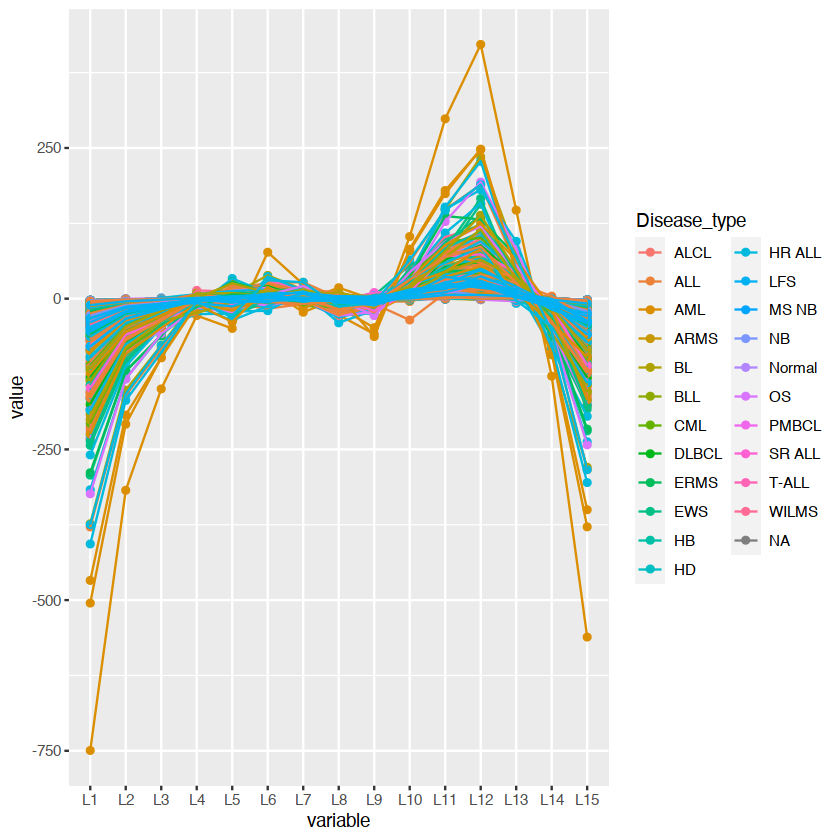

In [30]:
ggplot(data = length15_F1_m, aes(x = variable, y = value, color = Disease_type, group = basename)) + geom_point() + geom_line()

In [63]:
load("/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_10YO-M_PBMC_DNA_length15.RData")

In [65]:
-4.029/3

[1] -1.343

In [64]:
myaamat_list

,Freq,F1,F2,F3,F4,F5
A,NA,NA,NA,NA,NA,NA
C,3,-4.029,1.395,-2.586,-3.06,-0.765
D,NA,NA,NA,NA,NA,NA
E,NA,NA,NA,NA,NA,NA
F,NA,NA,NA,NA,NA,NA
G,NA,NA,NA,NA,NA,NA
H,NA,NA,NA,NA,NA,NA
I,NA,NA,NA,NA,NA,NA
K,NA,NA,NA,NA,NA,NA
L,NA,NA,NA,NA,NA,NA


In [16]:
load(paste0(h4hpath, "aaFeatures/CHP_358-02-PBMC-DNA_length15.RData"))

In [48]:
sum_features_aaP <- lapply(myaamat_list, function(x){ colSums(x[,2:6], na.rm = T)})
names(myaamat_list) <- paste0("L", 1:length(myaamat_list))
sum_features_aaP_df <- as.data.frame(sum_features_aaP)

In [49]:
sum_features_aaP_df

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,-21.488,-8.367,-5.654,0.751,-2.334,7.515,2.494,0.546,-1.342,-0.973,3.017,19.711,1.003,-7.526,-16.096
F2,7.440,-12.729,12.841,14.172,1.432,9.428,2.652,10.172,12.509,2.808,9.323,-15.182,-7.826,-0.004,-9.440
F3,-13.792,-23.809,-51.485,-51.477,-11.866,-6.453,1.710,3.508,2.018,4.010,17.467,22.358,-30.706,37.814,30.256
F4,-16.320,22.420,10.532,8.709,0.654,8.404,9.938,11.223,13.286,9.138,2.378,3.082,4.304,-7.693,-6.352
F5,-4.080,-9.839,-29.542,-27.240,-7.655,0.833,8.920,15.346,9.469,3.365,10.708,0.363,-18.930,14.093,6.592


In [50]:
aalength <- 15
myfeat <- "F1"

In [51]:
mysampleset <- list.files(paste0(h4hpath, "aaFeatures/"), pattern = paste(aalength, ".RData", sep = ""), full.names = T)

In [52]:
myLmat <- matrix(ncol = aalength, nrow = length(mysampleset),
                dimnames = list(mysampleset, paste0("L", 1:aalength)))

In [53]:
myLmat[1, ] <- unlist(sum_features_aaP_df[myfeat,])

In [54]:
head(myLmat)

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_10YO-M_PBMC_DNA_length15.RData,-21.488,-8.367,-5.654,0.751,-2.334,7.515,2.494,0.546,-1.342,-0.973,3.017,19.711,1.003,-7.526,-16.096
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_11YO-M_PBMC_DNA_length15.RData,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_15YO-F-A_PBMC_DNA_length15.RData,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_15YO-F-B_PBMC_DNA_length15.RData,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_15YO-M_PBMC_DNA_length15.RData,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/aaFeatures//CHP_1YO-M-A_PBMC_DNA_length15.RData,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# NMI

In [28]:
mat <- sapply(as.character(c("CASSFYGREADTQYF", "CASSVVGVYNSPLHF", "CASSLTRPSGNTIYF",
                            "CASSYQAGVGETQYF")), function(x){
      x <- as.character(x);
      x <- strsplit(x, "");
      x <- unlist( x )
   })

mat <- t(mat)

In [29]:
 res <- data.frame()
   for( i in 1:15 ){
   for( k in 1:15 ){
      print(paste0( i, ":", k))
      d1 <- mat[, c(i,k)]
      d1 <- as.data.frame(d1)
      colnames(d1) <- c("X","Y")
      d1 <- d1[ d1$X!="NA" &  d1$Y!="NA",] #revemo NA
      
      xlist <- as.character( unique(d1$X) )
      ylist <- as.character( unique(d1$Y) )
      
      #make frequency table
      freq <- matrix(0, nrow=length(xlist), ncol=length(ylist))
      row.names(freq) <- xlist
      colnames(freq) <- ylist
      
      for( x in xlist ){
      for( y in ylist ){
         both <- subset(d1, X==x & Y==y)
         freq[ x, y ] <- nrow( both )
      }
      }
      
      MI <- mi.empirical(freq, unit=c("log"))
      Hx <- entropy.empirical( colSums(freq) )
      Hy <- entropy.empirical( rowSums(freq) )
      NMI <- 2 * MI / ( Hx + Hy ) #normalized mutual entropy
      
      dump <- data.frame(i, k, MI, Hx, Hy, NMI)
      res <- rbind(res, dump)
      
   }
   }

[1] "1:1"
[1] "1:2"
[1] "1:3"
[1] "1:4"
[1] "1:5"
[1] "1:6"
[1] "1:7"
[1] "1:8"
[1] "1:9"
[1] "1:10"
[1] "1:11"
[1] "1:12"
[1] "1:13"
[1] "1:14"
[1] "1:15"
[1] "2:1"
[1] "2:2"
[1] "2:3"
[1] "2:4"
[1] "2:5"
[1] "2:6"
[1] "2:7"
[1] "2:8"
[1] "2:9"
[1] "2:10"
[1] "2:11"
[1] "2:12"
[1] "2:13"
[1] "2:14"
[1] "2:15"
[1] "3:1"
[1] "3:2"
[1] "3:3"
[1] "3:4"
[1] "3:5"
[1] "3:6"
[1] "3:7"
[1] "3:8"
[1] "3:9"
[1] "3:10"
[1] "3:11"
[1] "3:12"
[1] "3:13"
[1] "3:14"
[1] "3:15"
[1] "4:1"
[1] "4:2"
[1] "4:3"
[1] "4:4"
[1] "4:5"
[1] "4:6"
[1] "4:7"
[1] "4:8"
[1] "4:9"
[1] "4:10"
[1] "4:11"
[1] "4:12"
[1] "4:13"
[1] "4:14"
[1] "4:15"
[1] "5:1"
[1] "5:2"
[1] "5:3"
[1] "5:4"
[1] "5:5"
[1] "5:6"
[1] "5:7"
[1] "5:8"
[1] "5:9"
[1] "5:10"
[1] "5:11"
[1] "5:12"
[1] "5:13"
[1] "5:14"
[1] "5:15"
[1] "6:1"
[1] "6:2"
[1] "6:3"
[1] "6:4"
[1] "6:5"
[1] "6:6"
[1] "6:7"
[1] "6:8"
[1] "6:9"
[1] "6:10"
[1] "6:11"
[1] "6:12"
[1] "6:13"
[1] "6:14"
[1] "6:15"
[1] "7:1"
[1] "7:2"
[1] "7:3"
[1] "7:4"
[1] "7:5"
[1] "7:6"
[1] 

In [34]:
res

i,k,MI,Hx,Hy,NMI
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0.0000000,0,NaN
1,2,0,0.0000000,0,NaN
1,3,0,0.0000000,0,NaN
1,4,0,0.0000000,0,NaN
1,5,0,1.3862944,0,0
1,6,0,1.3862944,0,0
1,7,0,1.0397208,0,0
1,8,0,1.3862944,0,0
1,9,0,1.3862944,0,0
